In [1]:
# FULL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
def calculate_within_tolerance(y_true, y_pred, tolerance):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    within_tolerance = np.abs(y_true - y_pred) / y_true <= tolerance
    percentage_within_tolerance = np.mean(within_tolerance) * 100
    return percentage_within_tolerance

Dataset 2, Value 1:
  MSE: 86177.65
  MAE: 193.92
  RMSE: 293.56
  MAPE: 23.28%
  RMSPE: 32.58%
  R^2: 0.76
Dataset 2, Value 2:
  MSE: 144533.53
  MAE: 261.23
  RMSE: 380.18
  MAPE: 25.04%
  RMSPE: 38.53%
  R^2: 0.77
Dataset 3, Value 1:
  MSE: 60001.95
  MAE: 152.51
  RMSE: 244.95
  MAPE: 21.77%
  RMSPE: 30.69%
  R^2: 0.73
Dataset 3, Value 2:
  MSE: 128250.57
  MAE: 252.75
  RMSE: 358.12
  MAPE: 24.95%
  RMSPE: 35.99%
  R^2: 0.74
Dataset 3, Value 3:
  MSE: 152654.33
  MAE: 265.58
  RMSE: 390.71
  MAPE: 25.79%
  RMSPE: 40.81%
  R^2: 0.75
Dataset 4, Value 4:
  MSE: 53390.69
  MAE: 140.88
  RMSE: 231.06
  MAPE: 20.87%
  RMSPE: 29.72%
  R^2: 0.73
Dataset 4, Value 3:
  MSE: 119936.50
  MAE: 241.97
  RMSE: 346.32
  MAPE: 25.21%
  RMSPE: 36.18%
  R^2: 0.72
Dataset 4, Value 2:
  MSE: 139512.60
  MAE: 257.00
  RMSE: 373.51
  MAPE: 25.20%
  RMSPE: 38.49%
  R^2: 0.77
Dataset 4, Value 1:
  MSE: 189264.37
  MAE: 292.99
  RMSE: 435.05
  MAPE: 26.74%
  RMSPE: 44.89%
  R^2: 0.69
Dataset 5, Value 2:
  

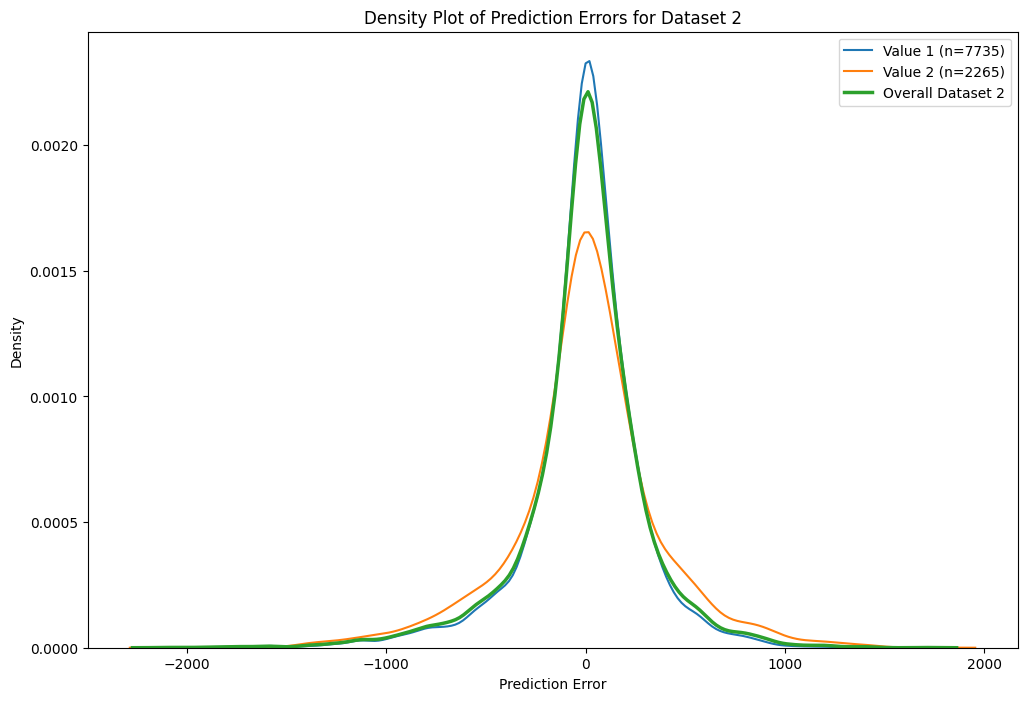

Overall Metrics for Dataset 2:
MSE: 101136.28
MAE: 205.71
RMSE: 318.02
MAPE: 23.33%
RMSPE: 34.95%
R^2: 0.77
Percentage within 10%: 35.17%
Percentage within 50%: 89.47%
Percentage within 100%: 98.05%


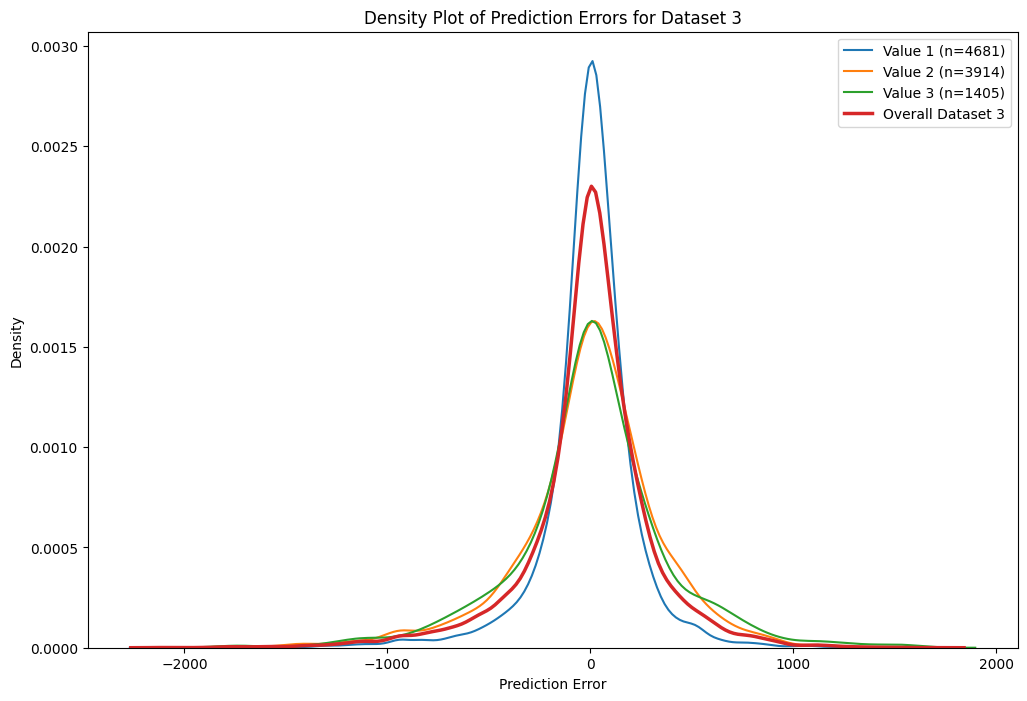

Overall Metrics for Dataset 3:
MSE: 101136.28
MAE: 205.71
RMSE: 318.02
MAPE: 23.33%
RMSPE: 34.95%
R^2: 0.77
Percentage within 10%: 35.17%
Percentage within 50%: 89.47%
Percentage within 100%: 98.05%


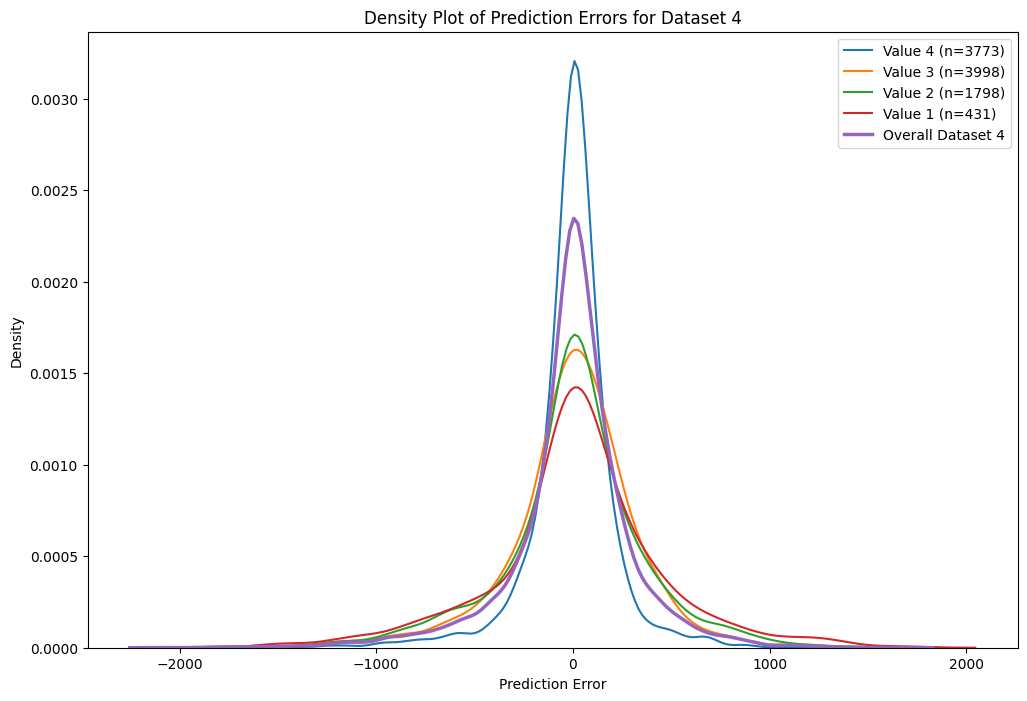

Overall Metrics for Dataset 4:
MSE: 101136.28
MAE: 205.71
RMSE: 318.02
MAPE: 23.33%
RMSPE: 34.95%
R^2: 0.77
Percentage within 10%: 35.17%
Percentage within 50%: 89.47%
Percentage within 100%: 98.05%


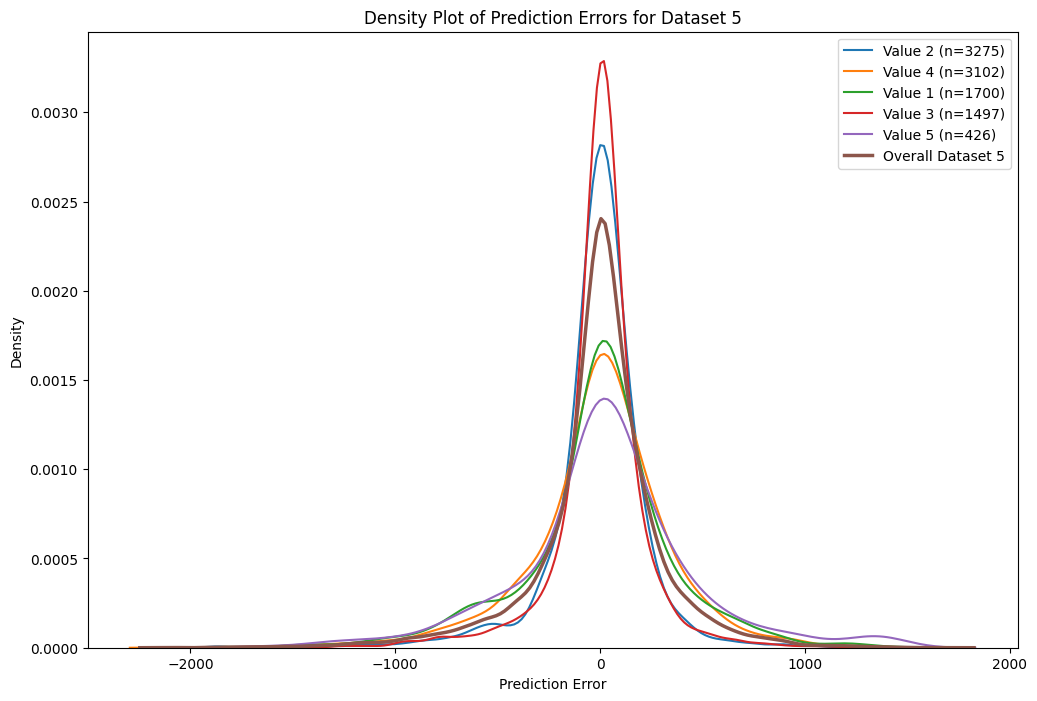

Overall Metrics for Dataset 5:
MSE: 101136.28
MAE: 205.71
RMSE: 318.02
MAPE: 23.33%
RMSPE: 34.95%
R^2: 0.77
Percentage within 10%: 35.17%
Percentage within 50%: 89.47%
Percentage within 100%: 98.05%


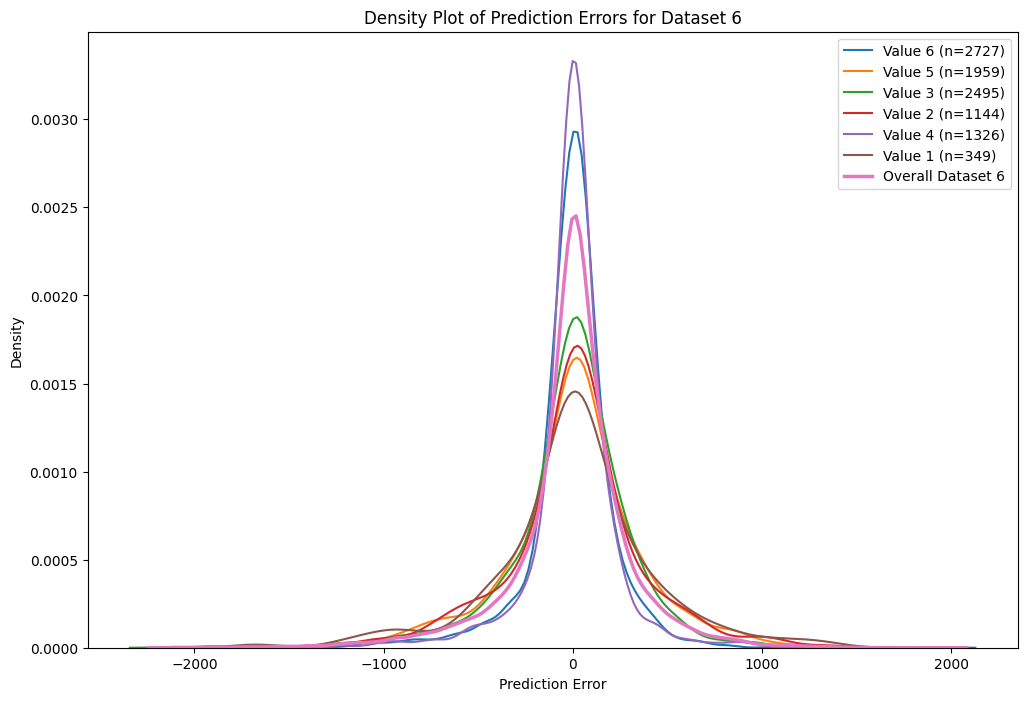

Overall Metrics for Dataset 6:
MSE: 101136.28
MAE: 205.71
RMSE: 318.02
MAPE: 23.33%
RMSPE: 34.95%
R^2: 0.77
Percentage within 10%: 35.17%
Percentage within 50%: 89.47%
Percentage within 100%: 98.05%


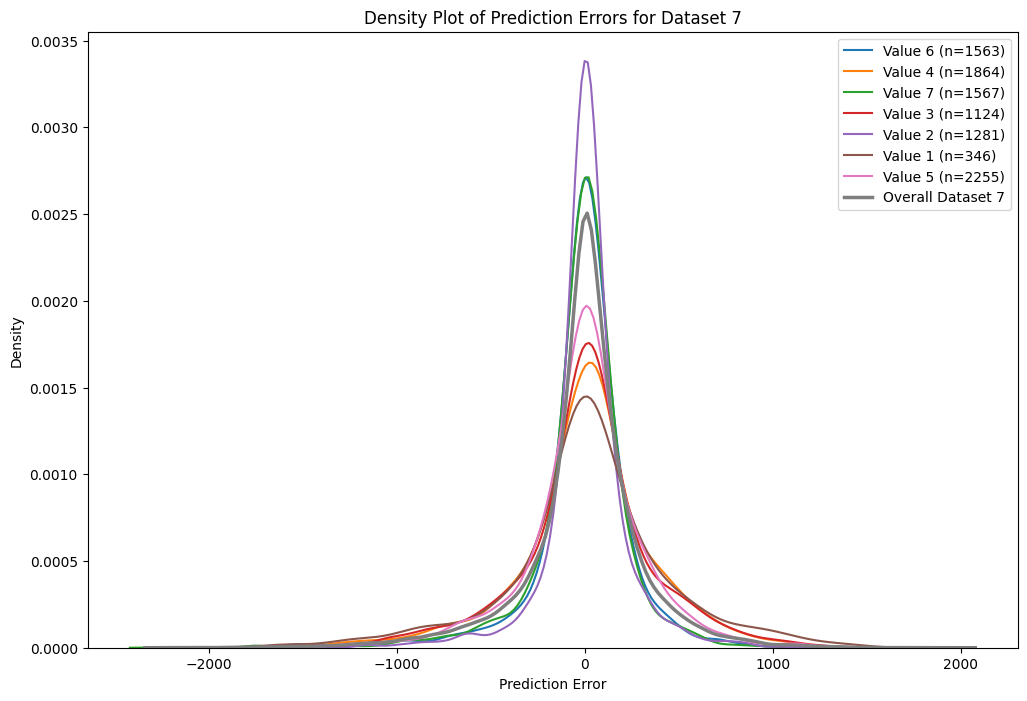

Overall Metrics for Dataset 7:
MSE: 101136.28
MAE: 205.71
RMSE: 318.02
MAPE: 23.33%
RMSPE: 34.95%
R^2: 0.77
Percentage within 10%: 35.17%
Percentage within 50%: 89.47%
Percentage within 100%: 98.05%


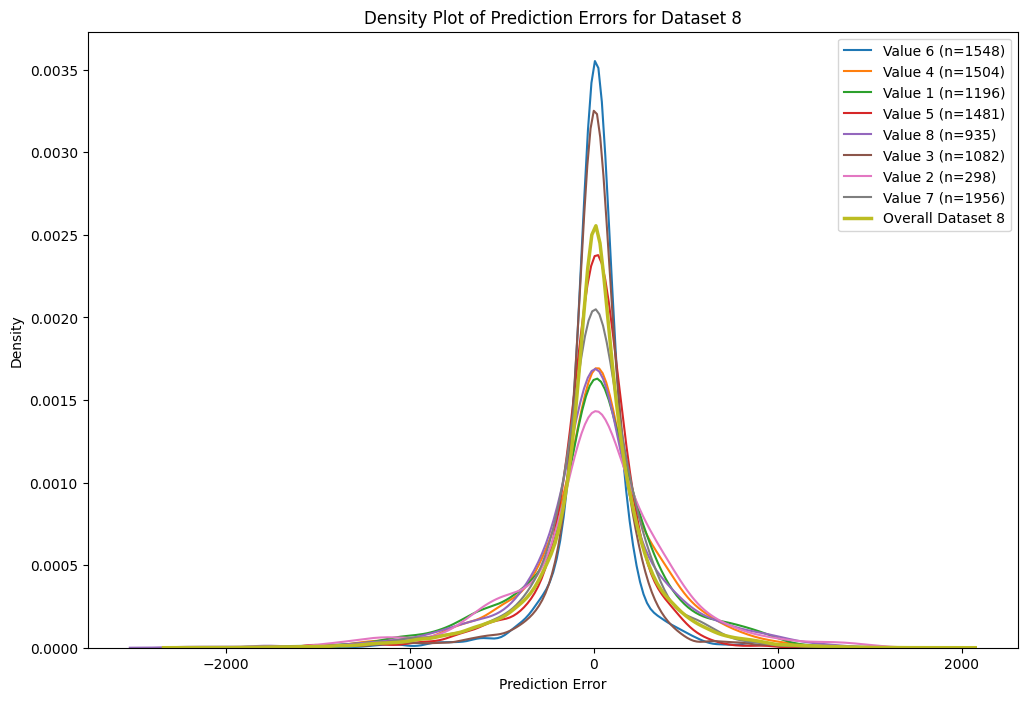

Overall Metrics for Dataset 8:
MSE: 101136.28
MAE: 205.71
RMSE: 318.02
MAPE: 23.33%
RMSPE: 34.95%
R^2: 0.77
Percentage within 10%: 35.17%
Percentage within 50%: 89.47%
Percentage within 100%: 98.05%


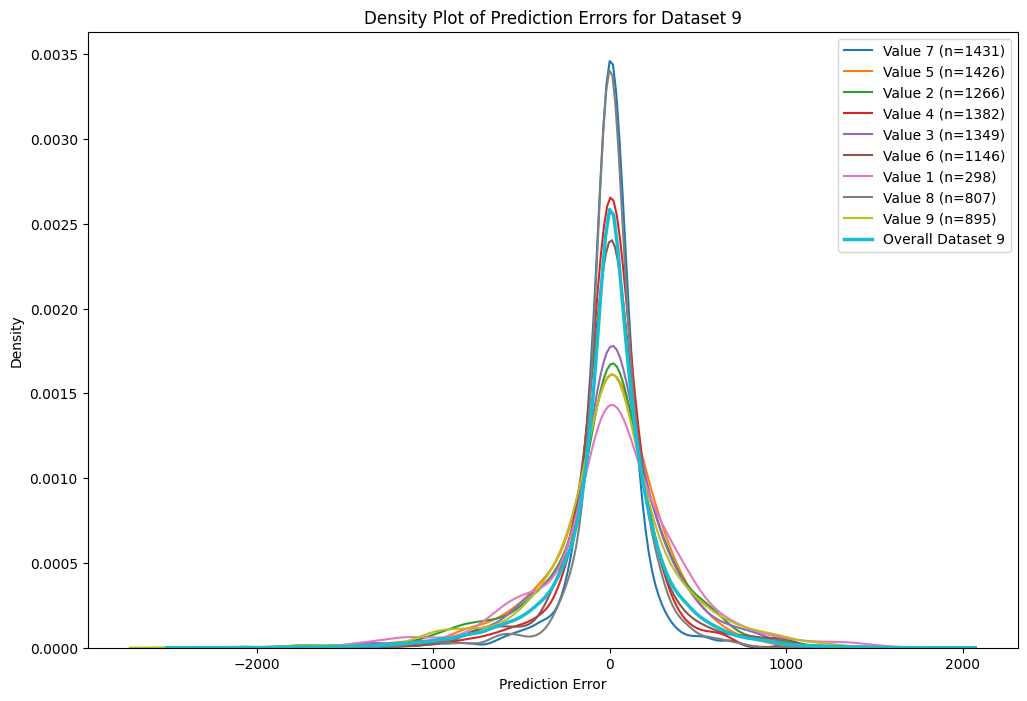

Overall Metrics for Dataset 9:
MSE: 101136.28
MAE: 205.71
RMSE: 318.02
MAPE: 23.33%
RMSPE: 34.95%
R^2: 0.77
Percentage within 10%: 35.17%
Percentage within 50%: 89.47%
Percentage within 100%: 98.05%


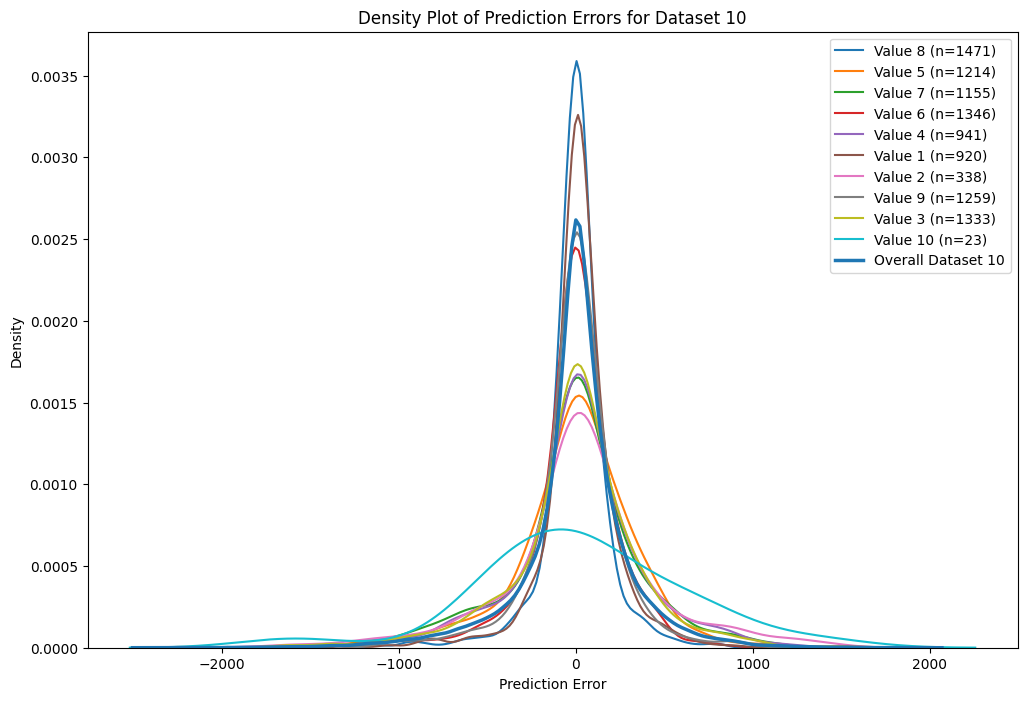

Overall Metrics for Dataset 10:
MSE: 101136.28
MAE: 205.71
RMSE: 318.02
MAPE: 23.33%
RMSPE: 34.95%
R^2: 0.77
Percentage within 10%: 35.17%
Percentage within 50%: 89.47%
Percentage within 100%: 98.05%


In [3]:
# Load the datasets
data_path = '../13. Data from R 50000/'
X_train = pd.read_parquet(data_path + 'X_train_2024.parquet', engine='pyarrow')
X_test = pd.read_parquet(data_path + 'X_test_2024.parquet', engine='pyarrow')
X_train_original_scale = pd.read_parquet(data_path + 'X_train_original_scale_2024.parquet', engine='pyarrow')
seed_num = 2024
# Load y_train and y_test
y_train = pd.read_parquet(data_path + 'y_train_2024.parquet').iloc[:, 0]
y_test = pd.read_parquet(data_path + 'y_test_2024.parquet').iloc[:, 0]

# List of categorical variables
categorical_vars = ["MARITALSTATUS", "NOOFCHILDREN", "HOMEOWNERIND", "VEHICLE_LEFTORRIGHTHANDDRIVE",
                    "DRIVER1_LICENCETYPE", "DRIVER2_LICENCETYPE", "DRIVER3_LICENCETYPE", "DRIVER4_LICENCETYPE",
                    "DRIVER1_OTHERVEHICLEOWNEDIND", "DRIVER2_OTHERVEHICLEOWNEDIND", "DRIVER3_OTHERVEHICLEOWNEDIND",
                    "DRIVER4_OTHERVEHICLEOWNEDIND", "MONTHLYPAYMENTSIND", "VEHICLE_USE_TYPE", "VEHICLEOVERNIGHTLOCATION",
                    "VEHICLE_OWNERSHIP", "VEHICLE_MODIFIEDIND", "VEHICLE_BODYTYPE", "VEHICLE_FUELTYPE",
                    "VEHICLE_TRANSMISSIONTYPE", "INDICATOR_NRCONVICTIONS_RECENT", "INDICATOR_CLAIMSCOUNT_RECENT"]

# Define numerical columns by excluding categorical ones
numerical_vars = [col for col in X_train.columns if col not in categorical_vars]

model_store = {}  # Dictionary to store models
prediction_store = {}  # Dictionary to store predictions
errors_store = {}  # Dictionary to store errors for plotting
subset_sizes = {}  # Dictionary to store subset sizes for legends

# Initialize lists to store the combined true values and predictions
all_y_test = []
all_y_pred = []

# Processing datasets
for i in range(2, 11):  # Loop from 2 to 10
    X_train_additional = pd.read_parquet(f'{data_path}X_train_proto_c{i}_seed_2024.parquet')
    X_test_additional = pd.read_parquet(f'{data_path}X_test_proto_c{i}_seed_2024.parquet')
    
    # Append the last columns to the main datasets
    X_train[f'additional_feature_{i}'] = X_train_additional.iloc[:, -1]
    X_test[f'additional_feature_{i}'] = X_test_additional.iloc[:, -1]

    # Initialize error storage for this dataset
    errors_store[i] = {}
    subset_sizes[i] = {}
    
    # Unique values in the 'additional_feature' column
    unique_values = X_train[f'additional_feature_{i}'].unique()

    # Initialize metrics lists
    mse_list = []
    mae_list = []
    rmse_list = []
    mape_list = []
    rmspe_list = []
    r2_list = []
    segment_sizes = []

    for value in unique_values:
        # Split the data by 'additional_feature'
        X_train_subset = X_train[X_train[f'additional_feature_{i}'] == value]
        X_test_subset = X_test[X_test[f'additional_feature_{i}'] == value]
        y_train_subset = y_train[X_train[f'additional_feature_{i}'] == value]
        y_test_subset = y_test[X_test[f'additional_feature_{i}'] == value]

        # Initialize and train the XGBoost model
        model = XGBRegressor(random_state=2024)
        model.fit(X_train_subset.drop(columns=[f'additional_feature_{i}']), y_train_subset)
        model_store[(i, value)] = model

        # Predict on the corresponding test set
        y_pred_subset = model.predict(X_test_subset.drop(columns=[f'additional_feature_{i}']))
        prediction_store[(i, value)] = y_pred_subset

        # Combine predictions and true values across all segments
        all_y_test.extend(y_test_subset.tolist())
        all_y_pred.extend(y_pred_subset.tolist())

        # Calculate metrics
        mse = mean_squared_error(y_test_subset, y_pred_subset)
        mae = mean_absolute_error(y_test_subset, y_pred_subset)
        rmse = np.sqrt(mse)
        mape = np.mean(np.abs((y_test_subset - y_pred_subset) / y_test_subset)) * 100
        rmspe = np.sqrt(np.mean(np.square((y_test_subset - y_pred_subset) / y_test_subset))) * 100
        r2 = r2_score(y_test_subset, y_pred_subset)

        # Store differences for plotting
        differences = y_pred_subset - y_test_subset
        errors_store[i][value] = differences
        subset_sizes[i][value] = len(y_test_subset)
        
        # Append metrics and segment size to lists
        mse_list.append(mse)
        mae_list.append(mae)
        rmse_list.append(rmse)
        mape_list.append(mape)
        rmspe_list.append(rmspe)
        r2_list.append(r2)
        segment_sizes.append(len(y_test_subset))

        # Print metrics for each subset
        print(f"Dataset {i}, Value {value}:")
        print(f"  MSE: {mse:.2f}")
        print(f"  MAE: {mae:.2f}")
        print(f"  RMSE: {rmse:.2f}")
        print(f"  MAPE: {mape:.2f}%")
        print(f"  RMSPE: {rmspe:.2f}%")
        print(f"  R^2: {r2:.2f}")

    # Add overall dataset differences for plotting (optional)
    errors_store[i]['overall'] = all_y_pred - np.array(all_y_test)

# Convert combined lists to numpy arrays for evaluation
all_y_test = np.array(all_y_test)
all_y_pred = np.array(all_y_pred)

# Evaluate the model on the combined data
mse = mean_squared_error(all_y_test, all_y_pred)
mae = mean_absolute_error(all_y_test, all_y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((all_y_test - all_y_pred) / all_y_test)) * 100
rmspe = np.sqrt(np.mean(np.square((all_y_test - all_y_pred) / all_y_test))) * 100
r2 = r2_score(all_y_test, all_y_pred)

# Print overall metrics for the combined test set
print(f'\nOverall Metrics for Combined Test Set:')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Percentage Error: {mape:.2f}%')
print(f'Root Mean Squared Percentage Error: {rmspe:.2f}%')
print(f'R-squared: {r2:.2f}')

# Function to calculate percentage within tolerance
def calculate_within_tolerance(y_true, y_pred, tolerance):
    within_tolerance = abs(y_true - y_pred) / y_true <= tolerance
    percentage_within_tolerance = within_tolerance.mean() * 100
    return percentage_within_tolerance

# Apply the function to the combined data
within_10_percent = calculate_within_tolerance(all_y_test, all_y_pred, 0.10)
within_50_percent = calculate_within_tolerance(all_y_test, all_y_pred, 0.50)
within_100_percent = calculate_within_tolerance(all_y_test, all_y_pred, 1.00)

print(f'Percentage within 10%: {within_10_percent:.2f}%')
print(f'Percentage within 50%: {within_50_percent:.2f}%')
print(f'Percentage within 100%: {within_100_percent:.2f}%')

# Plotting density curves of prediction errors for each dataset
for i in errors_store:
    plt.figure(figsize=(12, 8))
    for value, errors in errors_store[i].items():
        if value == 'overall':
            sns.kdeplot(errors, label=f'Overall Dataset {i}', linewidth=2.5)
        else:
            sns.kdeplot(errors, label=f'Value {value} (n={subset_sizes[i][value]})')
    plt.title(f'Density Plot of Prediction Errors for Dataset {i}')
    plt.xlabel('Prediction Error')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    # Displaying overall metrics for the combined data
    print(f"Overall Metrics for Dataset {i}:")
    print(f'MSE: {mse:.2f}')
    print(f'MAE: {mae:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f'MAPE: {mape:.2f}%')
    print(f'RMSPE: {rmspe:.2f}%')
    print(f'R^2: {r2:.2f}')
    print(f'Percentage within 10%: {within_10_percent:.2f}%')
    print(f'Percentage within 50%: {within_50_percent:.2f}%')
    print(f'Percentage within 100%: {within_100_percent:.2f}%')


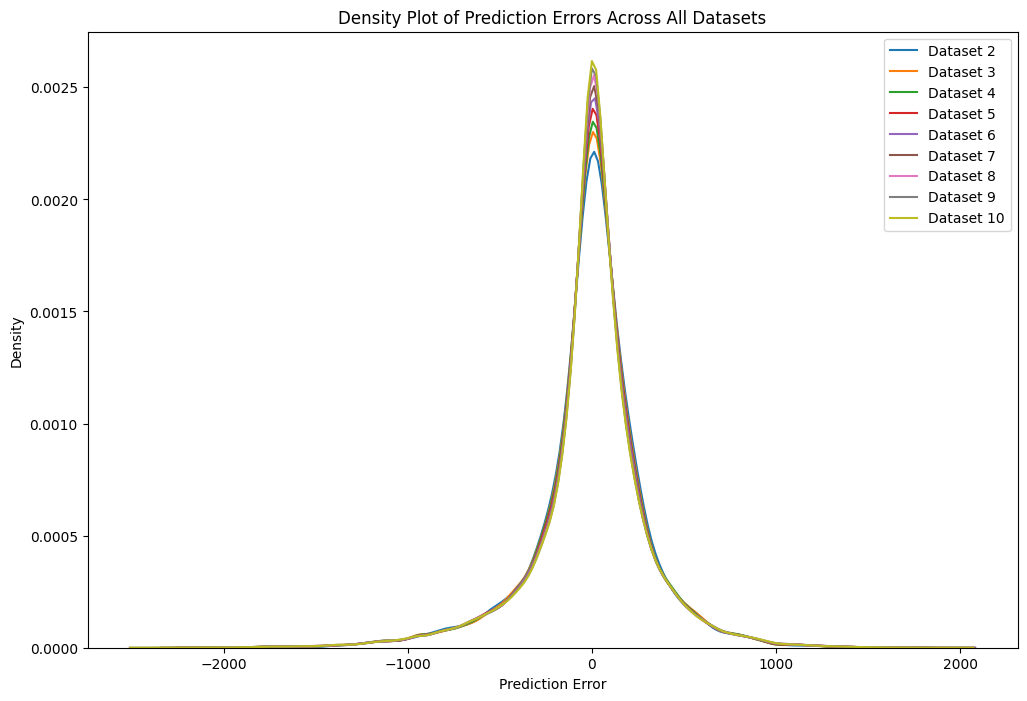

In [4]:
# Plotting density curves of prediction errors for each dataset
plt.figure(figsize=(12, 8))
for i in errors_store:
    sns.kdeplot(errors_store[i]['overall'], label=f'Dataset {i}')
plt.title('Density Plot of Prediction Errors Across All Datasets')
plt.xlabel('Prediction Error')
plt.ylabel('Density')
plt.legend()
plt.show()

Dataset 2, Value 1:
  MSE: 86177.65
  MAE: 193.92
  RMSE: 293.56
  MAPE: 23.28%
  RMSPE: 32.58%
  R^2: 0.76
Dataset 2, Value 2:
  MSE: 144533.53
  MAE: 261.23
  RMSE: 380.18
  MAPE: 25.04%
  RMSPE: 38.53%
  R^2: 0.77

Overall Metrics for Dataset 2:
  MSE: 99395.26
  MAE: 209.17
  RMSE: 315.27
  MAPE: 23.68%
  RMSPE: 34.02%
  R^2: 0.77
  Percentage within 10%: 31.89%
  Percentage within 50%: 89.72%
  Percentage within 100%: 98.39%
Dataset 3, Value 1:
  MSE: 60001.95
  MAE: 152.51
  RMSE: 244.95
  MAPE: 21.77%
  RMSPE: 30.69%
  R^2: 0.73
Dataset 3, Value 2:
  MSE: 128250.57
  MAE: 252.75
  RMSE: 358.12
  MAPE: 24.95%
  RMSPE: 35.99%
  R^2: 0.74
Dataset 3, Value 3:
  MSE: 152654.33
  MAE: 265.58
  RMSE: 390.71
  MAPE: 25.79%
  RMSPE: 40.81%
  R^2: 0.75

Overall Metrics for Dataset 3:
  MSE: 99732.12
  MAE: 207.63
  RMSE: 315.80
  MAPE: 23.58%
  RMSPE: 34.38%
  R^2: 0.77
  Percentage within 10%: 33.36%
  Percentage within 50%: 89.45%
  Percentage within 100%: 98.16%
Dataset 4, Value 4:
  M

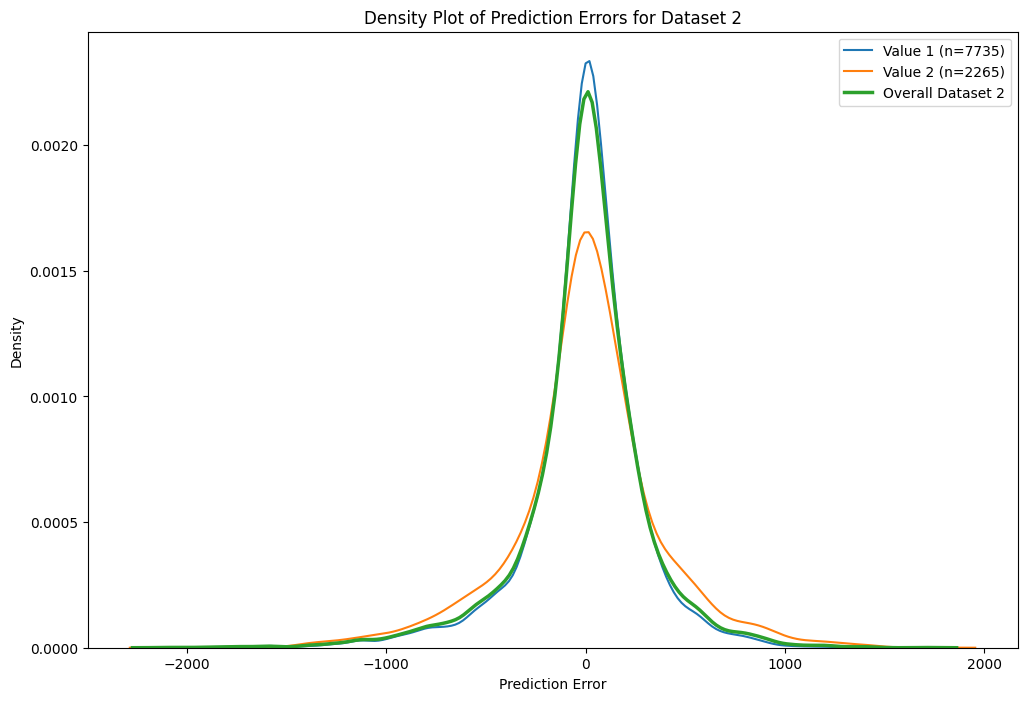

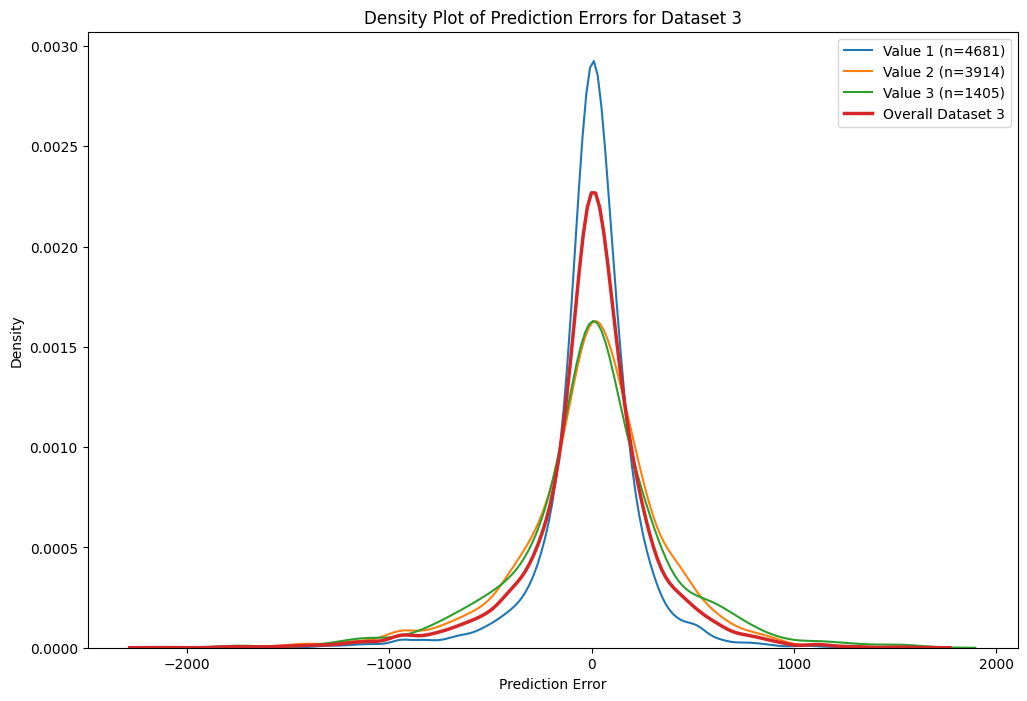

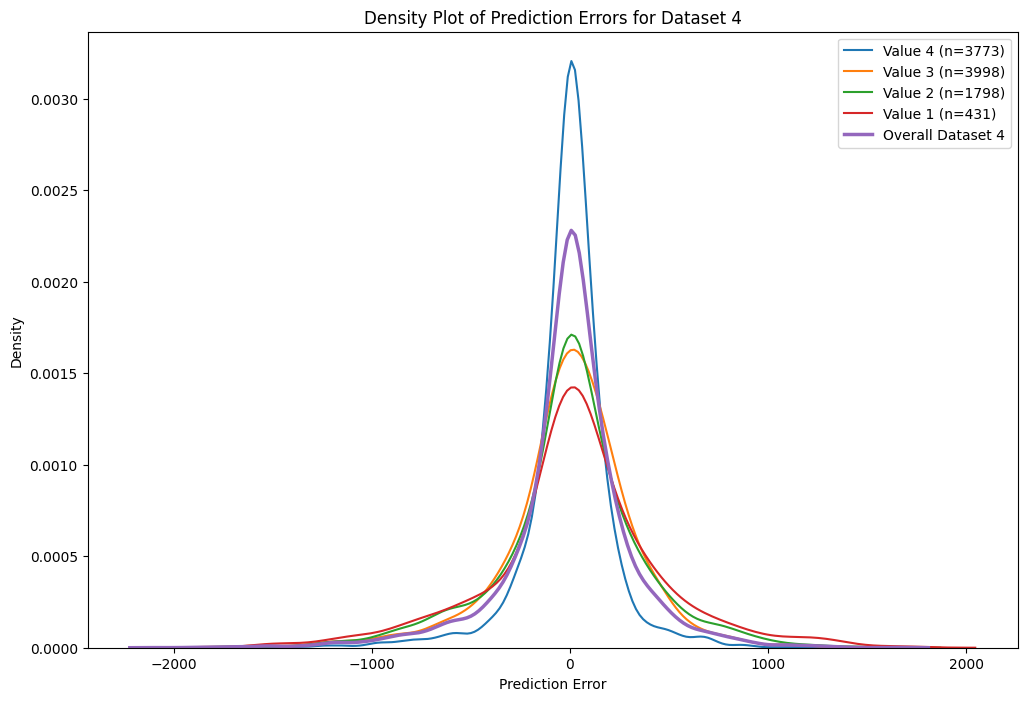

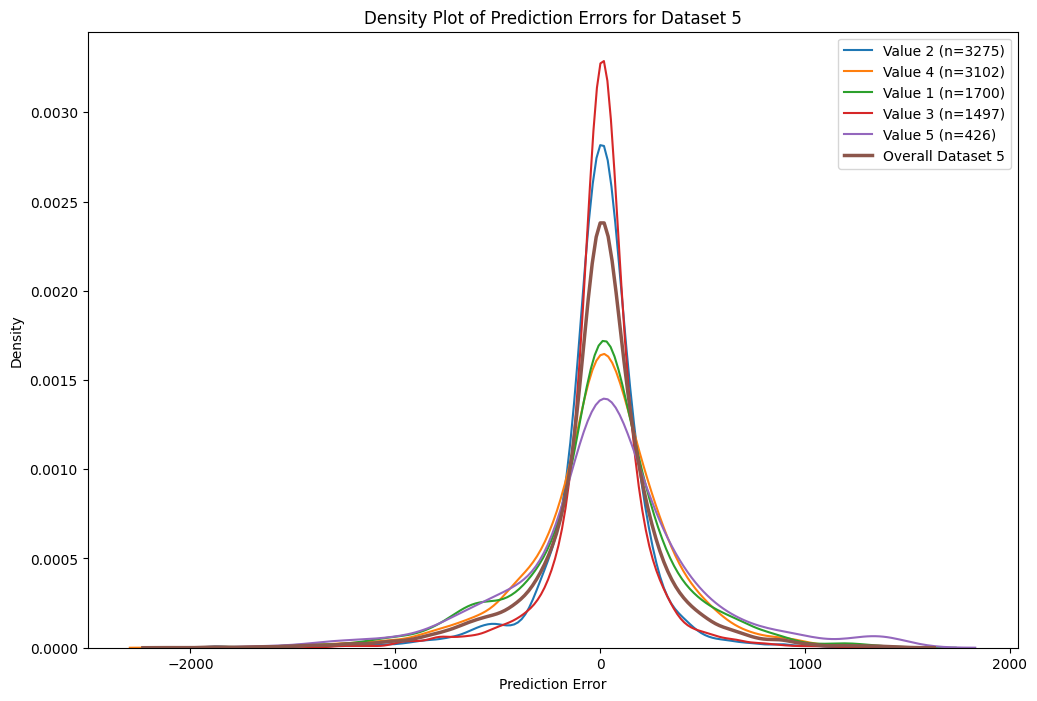

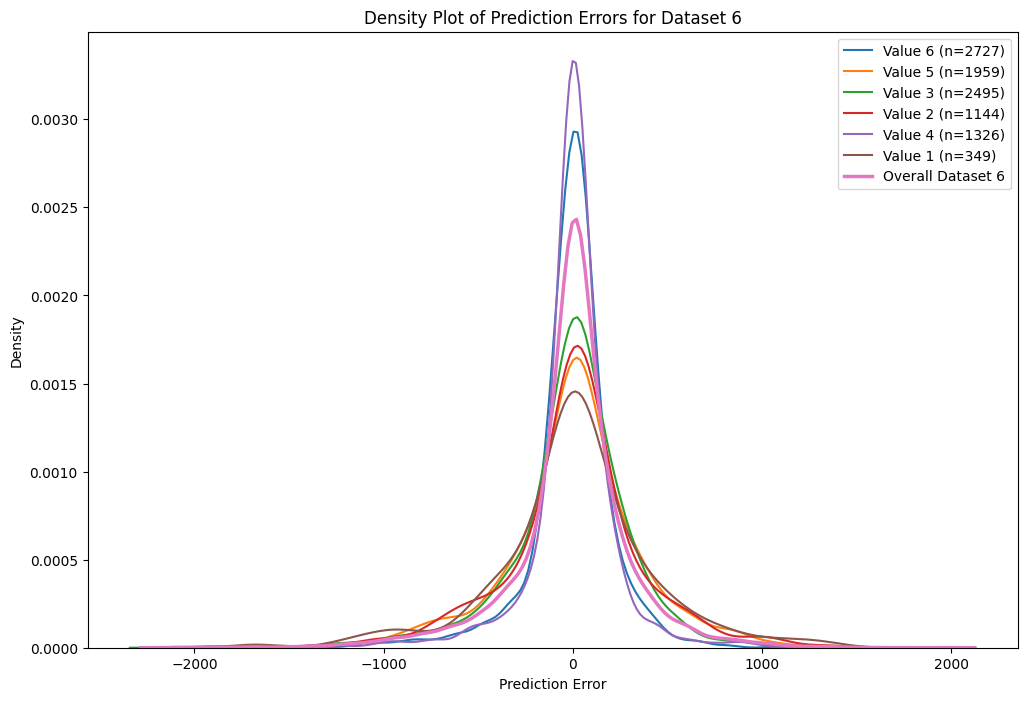

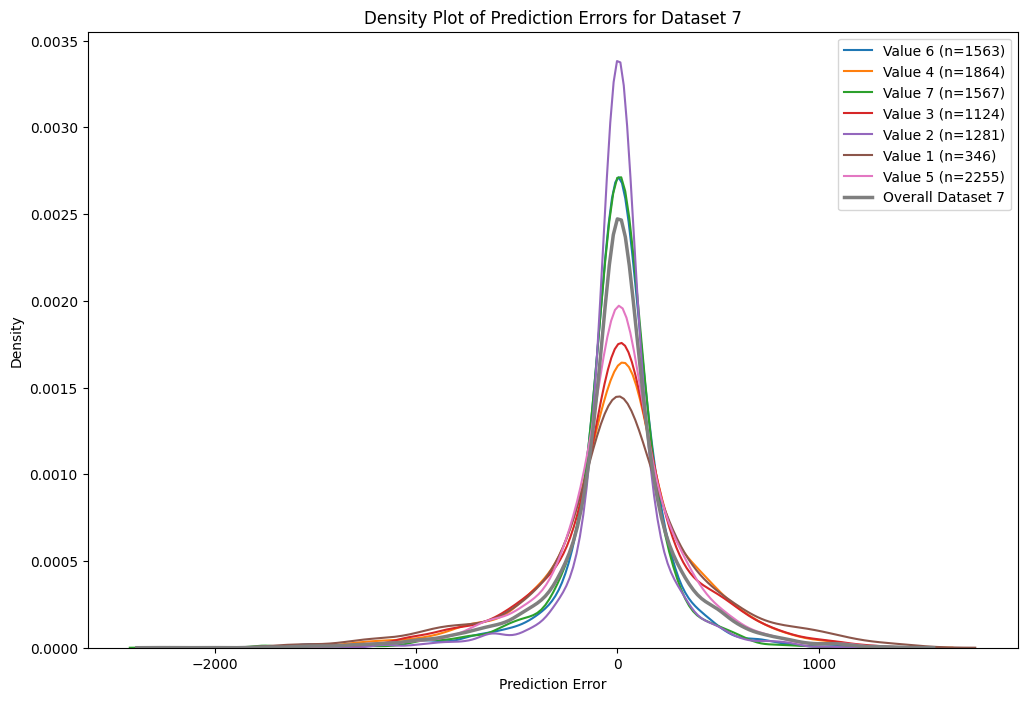

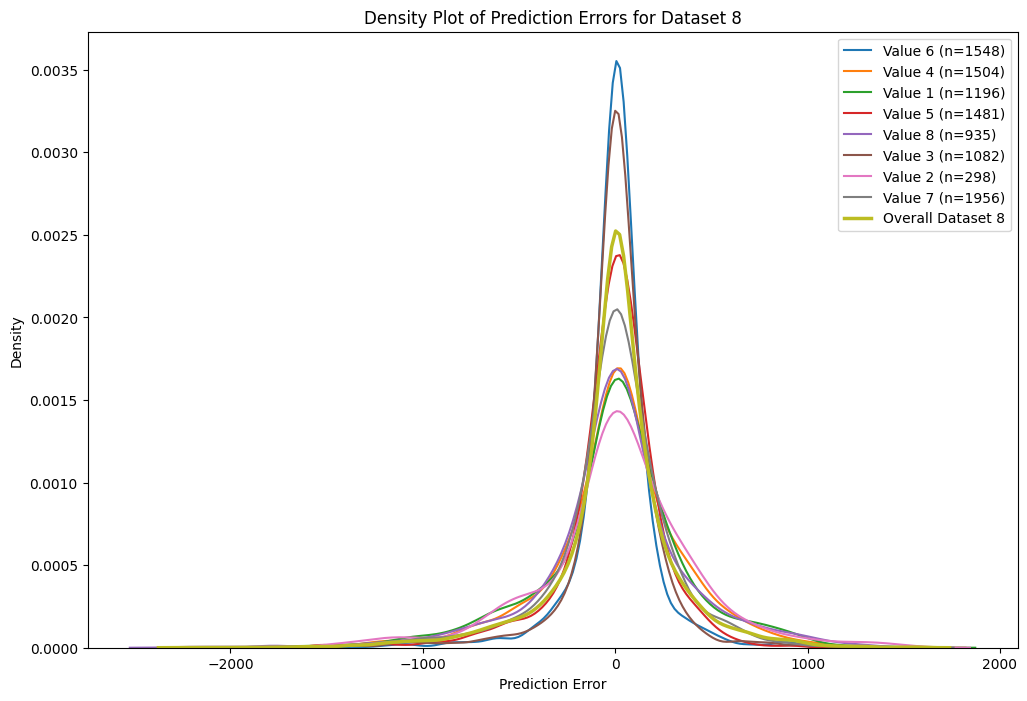

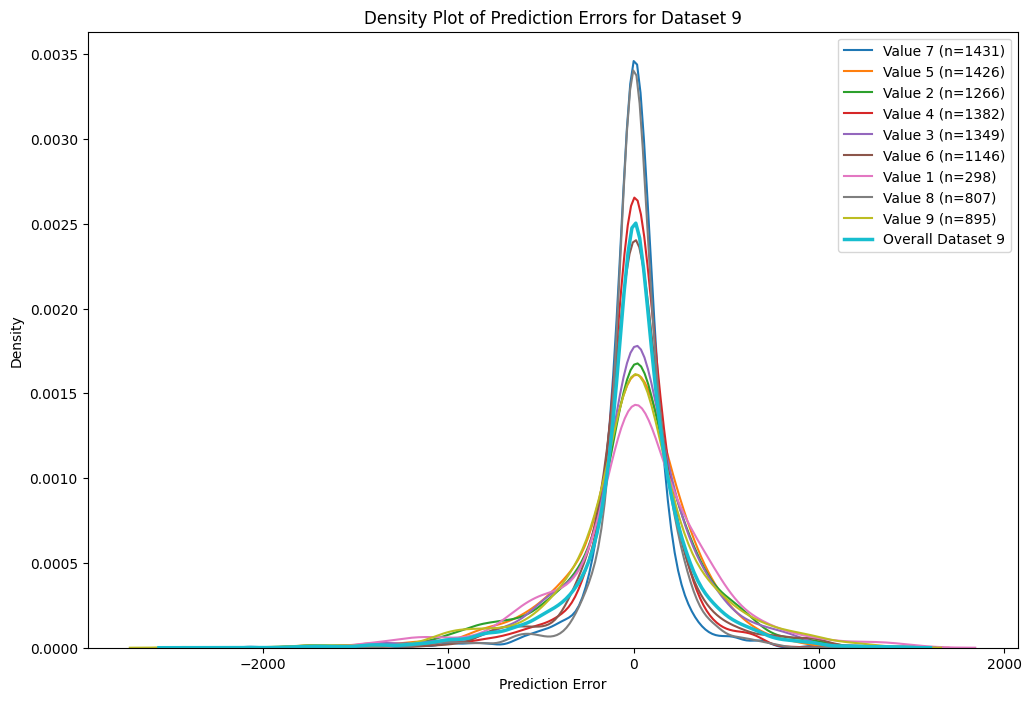

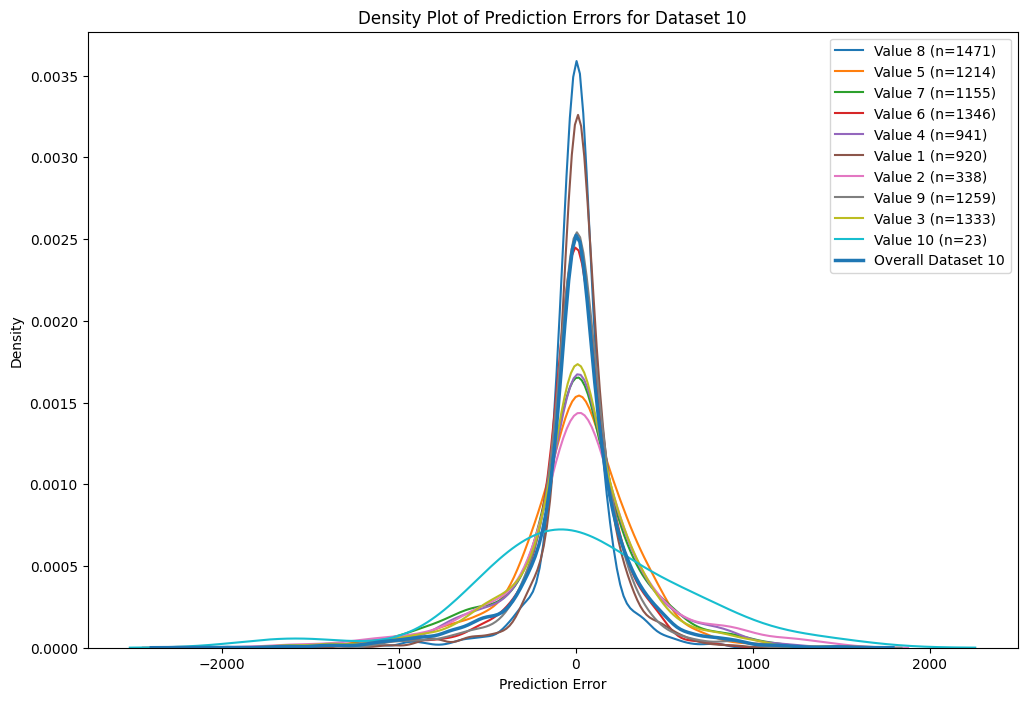

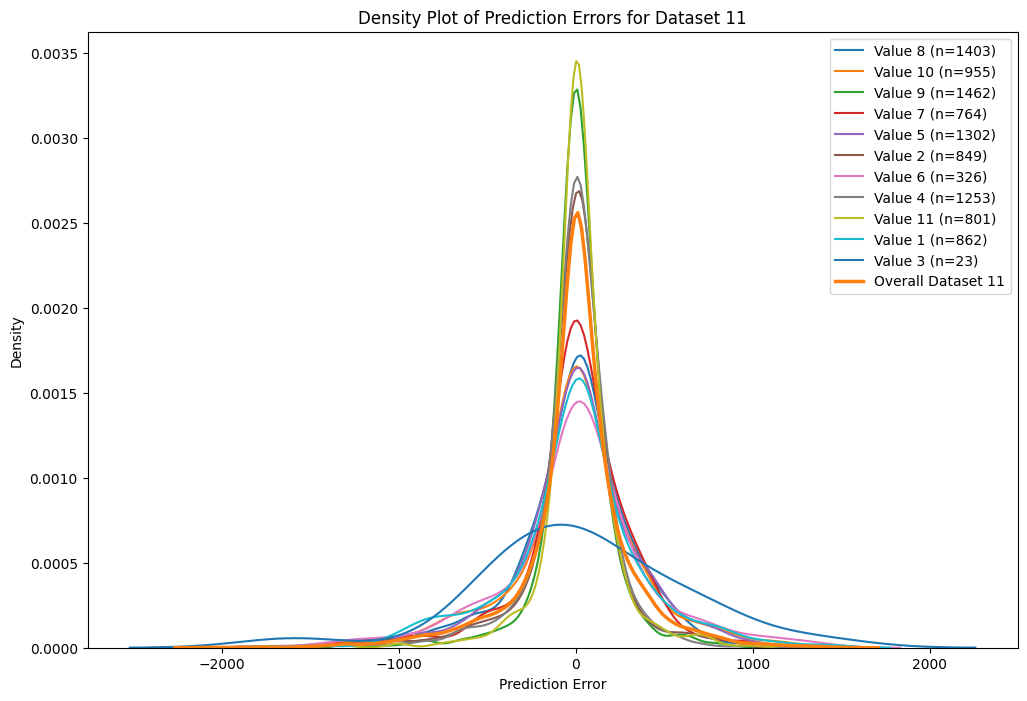

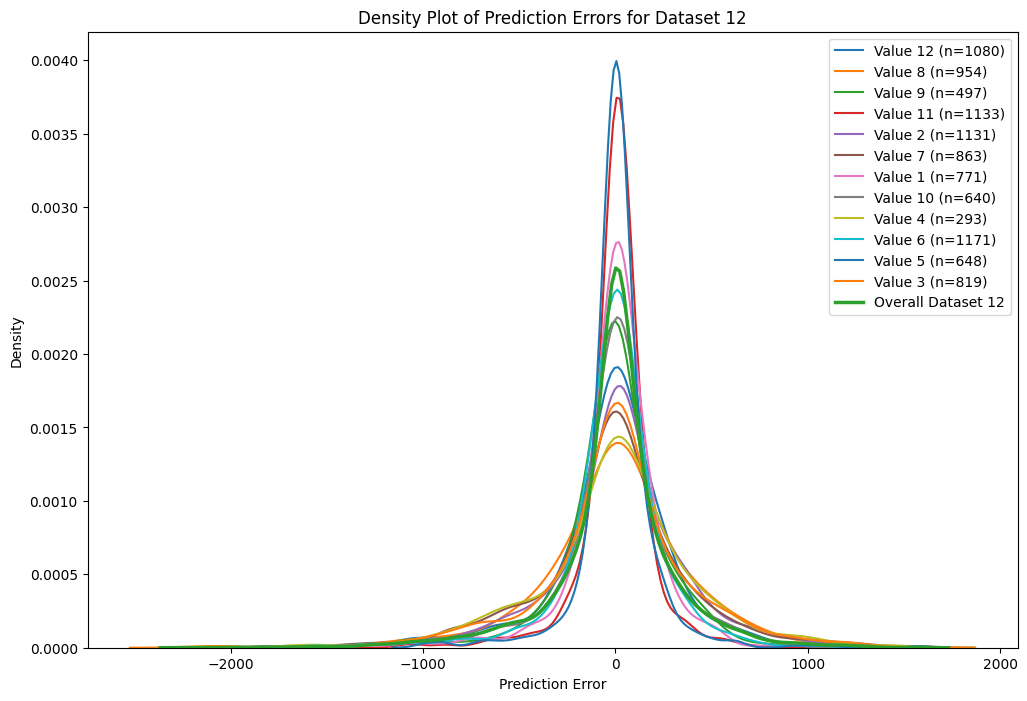

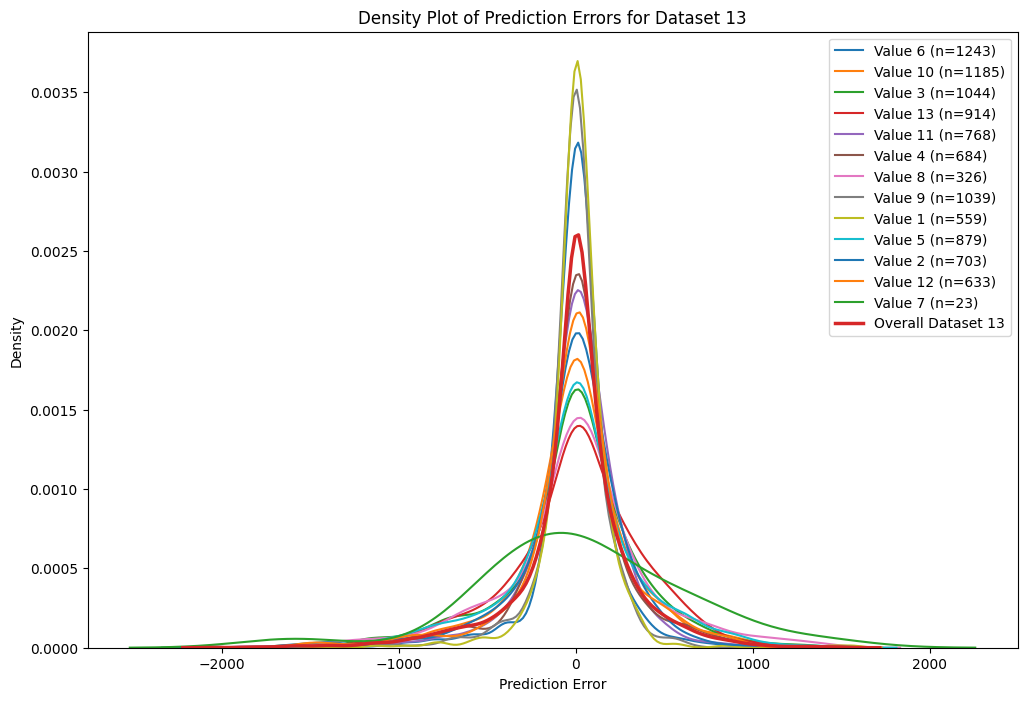

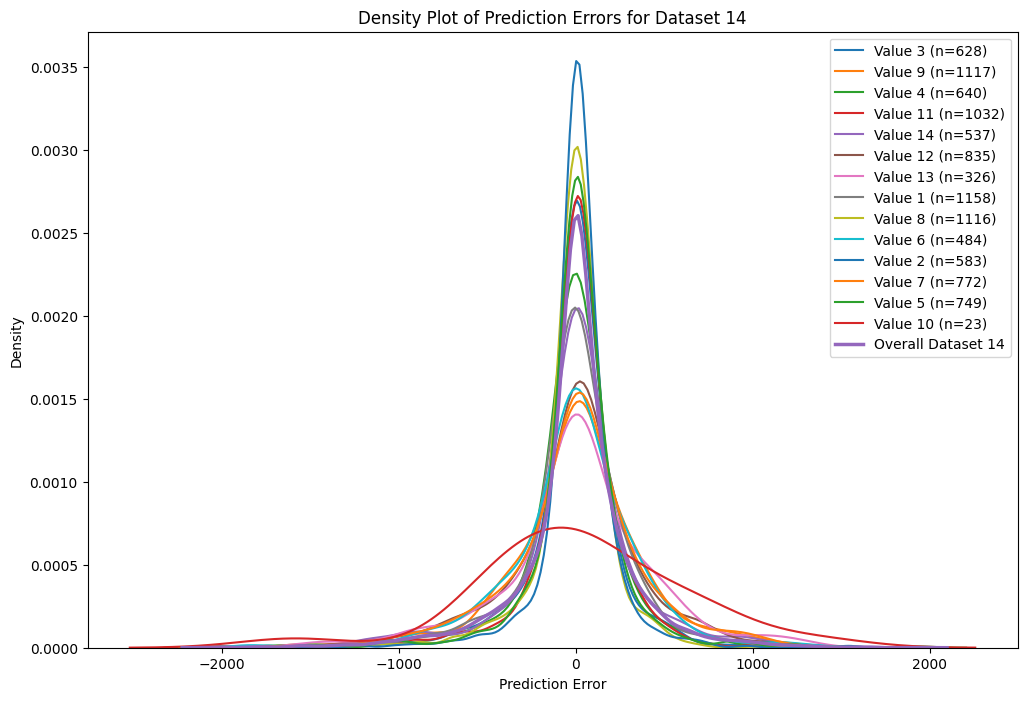

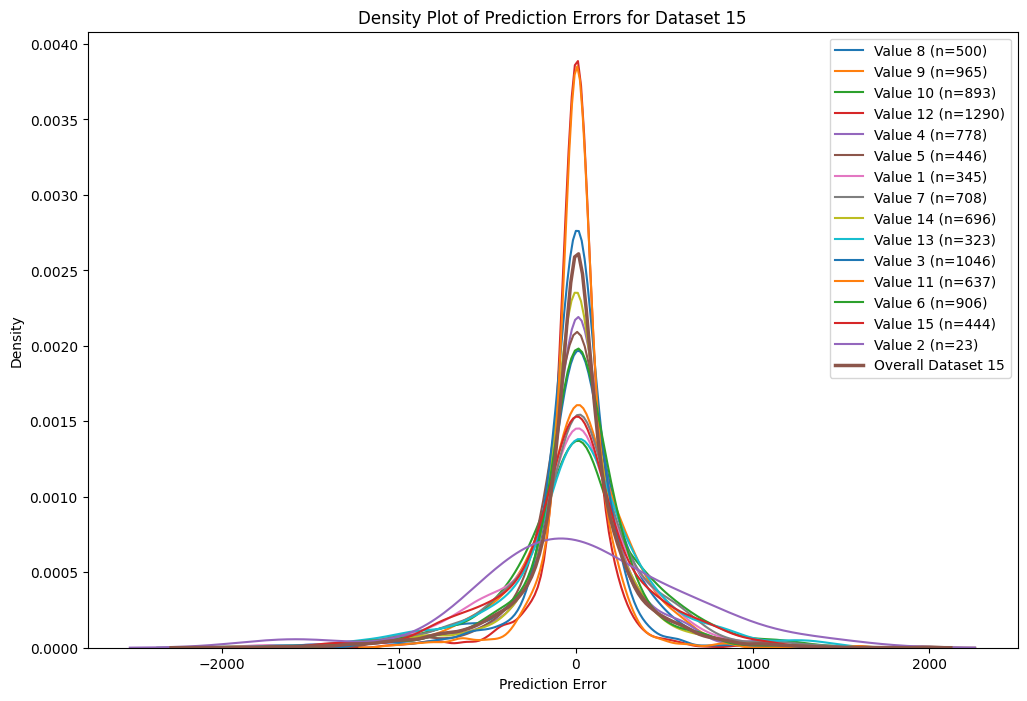

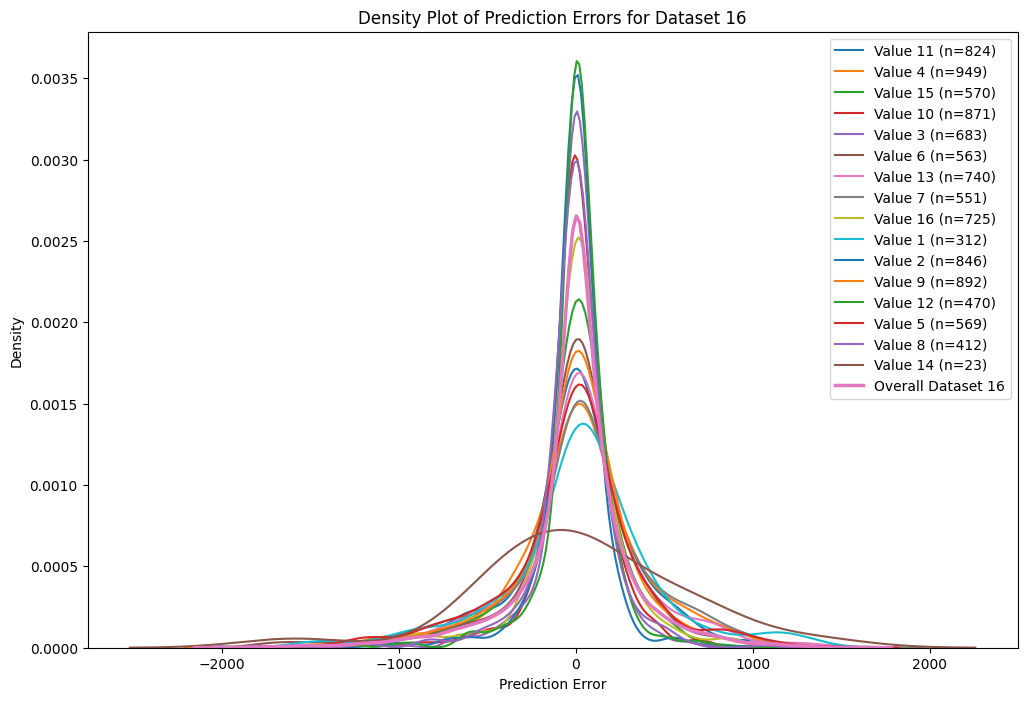

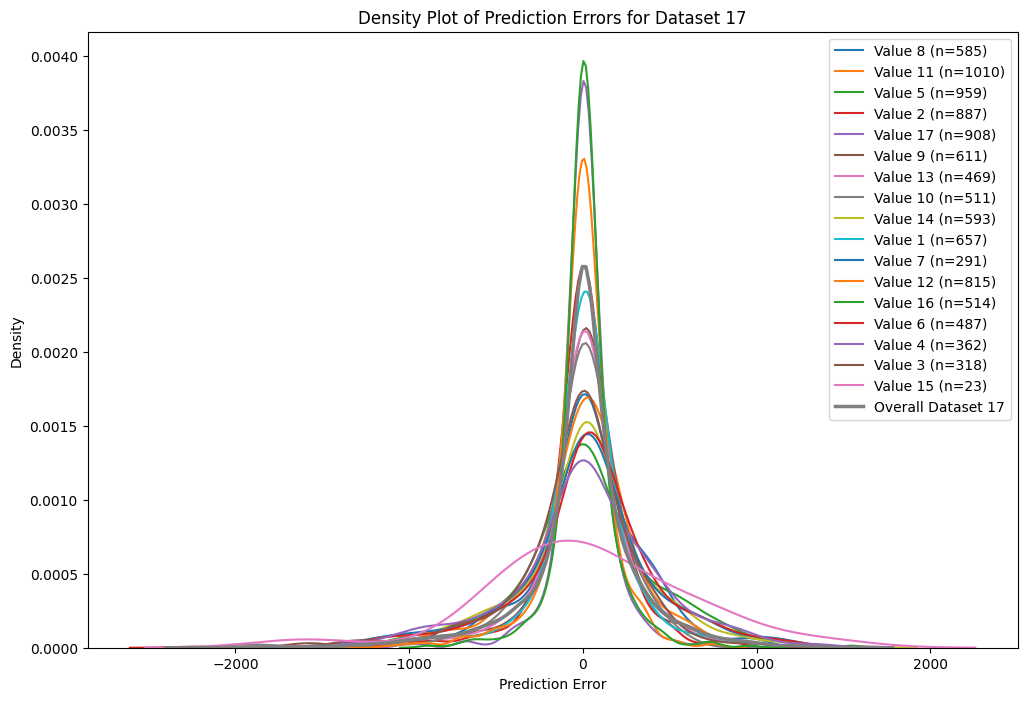

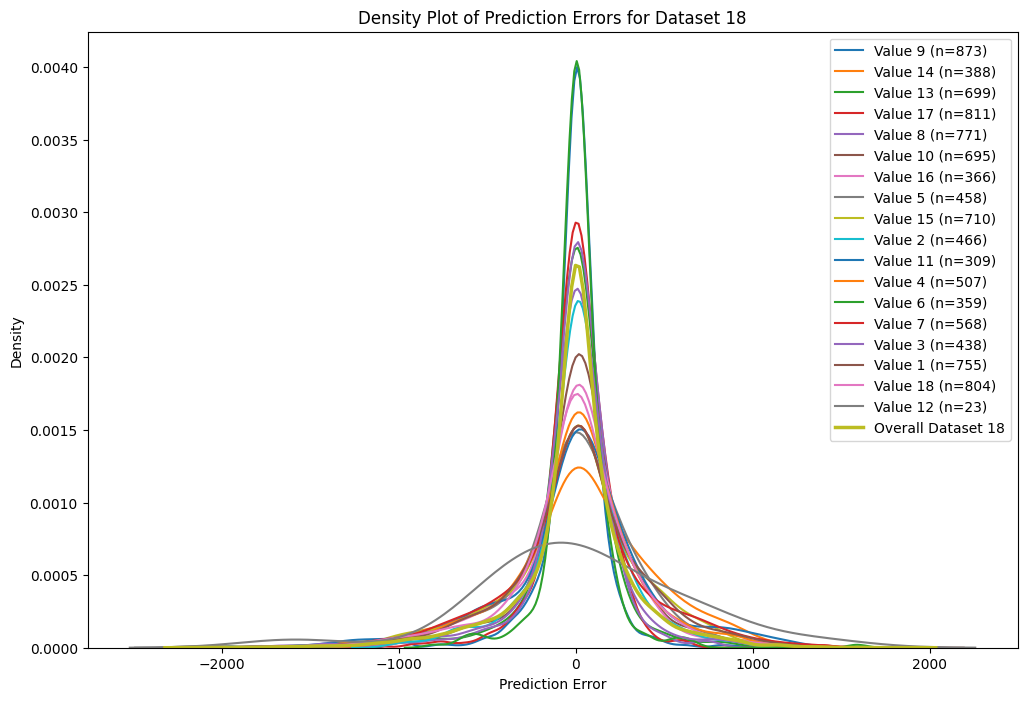

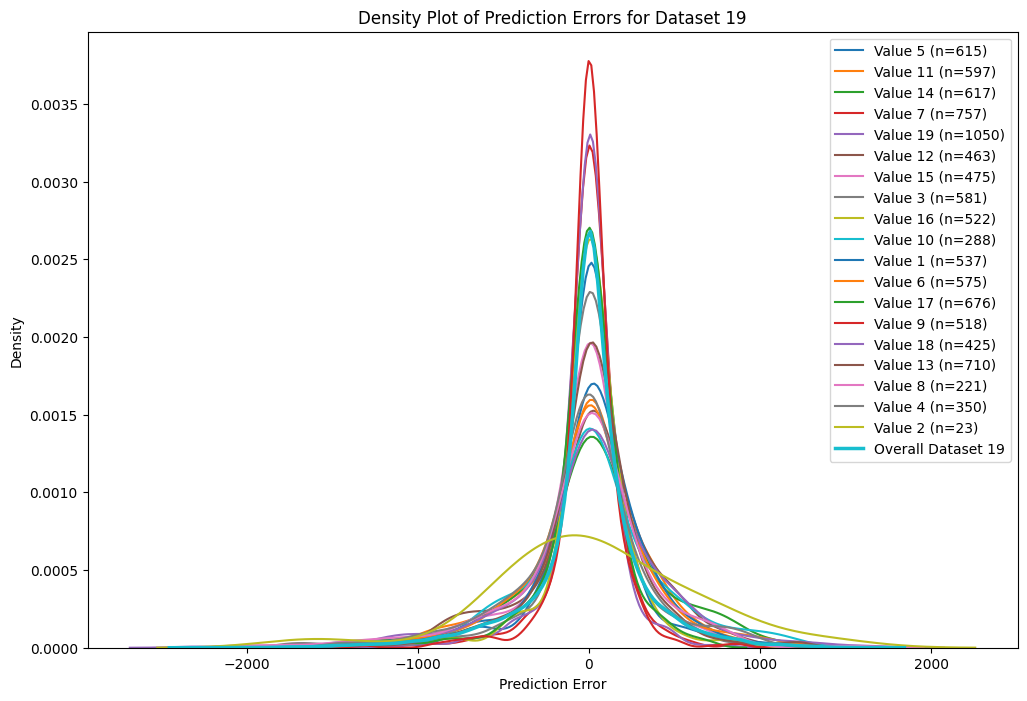

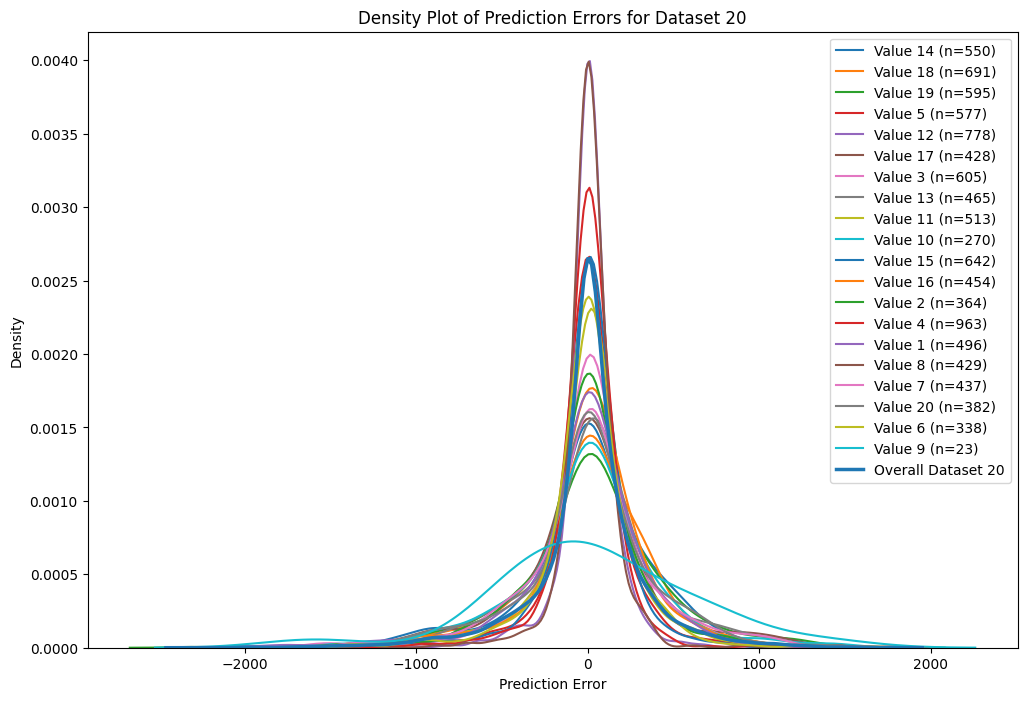

In [5]:
# Load the datasets
data_path = '../13. Data from R 50000/'
X_train = pd.read_parquet(data_path + 'X_train_2024.parquet', engine='pyarrow')
X_test = pd.read_parquet(data_path + 'X_test_2024.parquet', engine='pyarrow')
seed_num = 2024

# Load y_train and y_test
y_train = pd.read_parquet(data_path + 'y_train_2024.parquet').iloc[:, 0]
y_test = pd.read_parquet(data_path + 'y_test_2024.parquet').iloc[:, 0]

# List of categorical variables
categorical_vars = [
    "MARITALSTATUS", "NOOFCHILDREN", "HOMEOWNERIND", "VEHICLE_LEFTORRIGHTHANDDRIVE",
    "DRIVER1_LICENCETYPE", "DRIVER2_LICENCETYPE", "DRIVER3_LICENCETYPE", "DRIVER4_LICENCETYPE",
    "DRIVER1_OTHERVEHICLEOWNEDIND", "DRIVER2_OTHERVEHICLEOWNEDIND", "DRIVER3_OTHERVEHICLEOWNEDIND",
    "DRIVER4_OTHERVEHICLEOWNEDIND", "MONTHLYPAYMENTSIND", "VEHICLE_USE_TYPE", "VEHICLEOVERNIGHTLOCATION",
    "VEHICLE_OWNERSHIP", "VEHICLE_MODIFIEDIND", "VEHICLE_BODYTYPE", "VEHICLE_FUELTYPE",
    "VEHICLE_TRANSMISSIONTYPE", "INDICATOR_NRCONVICTIONS_RECENT", "INDICATOR_CLAIMSCOUNT_RECENT"
]

# Define numerical columns by excluding categorical ones
numerical_vars = [col for col in X_train.columns if col not in categorical_vars]

# Dictionaries to store models, predictions, errors, and subset sizes
model_store = {}
prediction_store = {}
errors_store = {}
subset_sizes = {}

# Initialize lists to store the combined true values and predictions across all datasets
all_y_test_global = []
all_y_pred_global = []

# Function to calculate percentage within tolerance
def calculate_within_tolerance(y_true, y_pred, tolerance):
    within_tolerance = abs(y_true - y_pred) / y_true <= tolerance
    percentage_within_tolerance = within_tolerance.mean() * 100
    return percentage_within_tolerance

# Processing datasets
for i in range(2, 21):  # Loop from 2 to 10 clusters
    X_train_additional = pd.read_parquet(f'{data_path}X_train_proto_c{i}_seed_2024.parquet')
    X_test_additional = pd.read_parquet(f'{data_path}X_test_proto_c{i}_seed_2024.parquet')
    
    # Append the last columns to the main datasets
    X_train[f'additional_feature_{i}'] = X_train_additional.iloc[:, -1]
    X_test[f'additional_feature_{i}'] = X_test_additional.iloc[:, -1]

    # Initialize error storage for this dataset
    errors_store[i] = {}
    subset_sizes[i] = {}
    
    # Unique values in the 'additional_feature' column
    unique_values = X_train[f'additional_feature_{i}'].unique()

    # Initialize lists to store the combined true values and predictions for this dataset
    dataset_y_test = []
    dataset_y_pred = []
    
    # Initialize metrics lists
    mse_list = []
    mae_list = []
    rmse_list = []
    mape_list = []
    rmspe_list = []
    r2_list = []
    segment_sizes = []

    for value in unique_values:
        # Split the data by 'additional_feature'
        X_train_subset = X_train[X_train[f'additional_feature_{i}'] == value]
        X_test_subset = X_test[X_test[f'additional_feature_{i}'] == value]
        y_train_subset = y_train[X_train[f'additional_feature_{i}'] == value]
        y_test_subset = y_test[X_test[f'additional_feature_{i}'] == value]

        # Initialize and train the XGBoost model
        model = XGBRegressor(random_state=2024)
        model.fit(X_train_subset.drop(columns=[f'additional_feature_{i}']), y_train_subset)
        model_store[(i, value)] = model

        # Predict on the corresponding test set
        y_pred_subset = model.predict(X_test_subset.drop(columns=[f'additional_feature_{i}']))
        prediction_store[(i, value)] = y_pred_subset

        # Combine predictions and true values for this dataset
        dataset_y_test.extend(y_test_subset.tolist())
        dataset_y_pred.extend(y_pred_subset.tolist())

        # Calculate metrics for this subset
        mse = mean_squared_error(y_test_subset, y_pred_subset)
        mae = mean_absolute_error(y_test_subset, y_pred_subset)
        rmse = np.sqrt(mse)
        mape = np.mean(np.abs((y_test_subset - y_pred_subset) / y_test_subset)) * 100
        rmspe = np.sqrt(np.mean(np.square((y_test_subset - y_pred_subset) / y_test_subset))) * 100
        r2 = r2_score(y_test_subset, y_pred_subset)

        # Store differences for plotting
        differences = y_pred_subset - y_test_subset
        errors_store[i][value] = differences
        subset_sizes[i][value] = len(y_test_subset)
        
        # Append metrics and segment size to lists
        mse_list.append(mse)
        mae_list.append(mae)
        rmse_list.append(rmse)
        mape_list.append(mape)
        rmspe_list.append(rmspe)
        r2_list.append(r2)
        segment_sizes.append(len(y_test_subset))

        # Print metrics for each subset
        print(f"Dataset {i}, Value {value}:")
        print(f"  MSE: {mse:.2f}")
        print(f"  MAE: {mae:.2f}")
        print(f"  RMSE: {rmse:.2f}")
        print(f"  MAPE: {mape:.2f}%")
        print(f"  RMSPE: {rmspe:.2f}%")
        print(f"  R^2: {r2:.2f}")

    # Convert combined lists to numpy arrays for overall evaluation for this dataset
    dataset_y_test = np.array(dataset_y_test)
    dataset_y_pred = np.array(dataset_y_pred)

    # Combine the current dataset predictions with the global lists
    all_y_test_global.extend(dataset_y_test)
    all_y_pred_global.extend(dataset_y_pred)

    # Calculate overall metrics for the current dataset
    overall_mse = mean_squared_error(dataset_y_test, dataset_y_pred)
    overall_mae = mean_absolute_error(dataset_y_test, dataset_y_pred)
    overall_rmse = np.sqrt(overall_mse)
    overall_mape = np.mean(np.abs((dataset_y_test - dataset_y_pred) / dataset_y_test)) * 100
    overall_rmspe = np.sqrt(np.mean(np.square((dataset_y_test - dataset_y_pred) / dataset_y_test))) * 100
    overall_r2 = r2_score(dataset_y_test, dataset_y_pred)

    # Calculate percentage within tolerance for the current dataset
    overall_within_10 = calculate_within_tolerance(dataset_y_test, dataset_y_pred, 0.10)
    overall_within_50 = calculate_within_tolerance(dataset_y_test, dataset_y_pred, 0.50)
    overall_within_100 = calculate_within_tolerance(dataset_y_test, dataset_y_pred, 1.00)

    # Add overall dataset differences for plotting (optional)
    errors_store[i]['overall'] = dataset_y_pred - dataset_y_test

    # Display overall metrics for the current dataset
    print(f"\nOverall Metrics for Dataset {i}:")
    print(f"  MSE: {overall_mse:.2f}")
    print(f"  MAE: {overall_mae:.2f}")
    print(f"  RMSE: {overall_rmse:.2f}")
    print(f"  MAPE: {overall_mape:.2f}%")
    print(f"  RMSPE: {overall_rmspe:.2f}%")
    print(f"  R^2: {overall_r2:.2f}")
    print(f"  Percentage within 10%: {overall_within_10:.2f}%")
    print(f"  Percentage within 50%: {overall_within_50:.2f}%")
    print(f"  Percentage within 100%: {overall_within_100:.2f}%")

# Plotting density curves of prediction errors for each dataset
for i in errors_store:
    plt.figure(figsize=(12, 8))
    for value, errors in errors_store[i].items():
        if value == 'overall':
            sns.kdeplot(errors, label=f'Overall Dataset {i}', linewidth=2.5)
        else:
            sns.kdeplot(errors, label=f'Value {value} (n={subset_sizes[i][value]})')
    plt.title(f'Density Plot of Prediction Errors for Dataset {i}')
    plt.xlabel('Prediction Error')
    plt.ylabel('Density')
    plt.legend()
    plt.show()


In [6]:
##### Update to plot cluster number

In [7]:
# Load the datasets
data_path = '../13. Data from R 50000/'
X_train = pd.read_parquet(data_path + 'X_train_2024.parquet', engine='pyarrow')
X_test = pd.read_parquet(data_path + 'X_test_2024.parquet', engine='pyarrow')
seed_num = 2024

# Load y_train and y_test
y_train = pd.read_parquet(data_path + 'y_train_2024.parquet').iloc[:, 0]
y_test = pd.read_parquet(data_path + 'y_test_2024.parquet').iloc[:, 0]

# Function to calculate percentage within tolerance
def calculate_within_tolerance(y_true, y_pred, tolerance):
    within_tolerance = abs(y_true - y_pred) / y_true <= tolerance
    percentage_within_tolerance = within_tolerance.mean() * 100
    return percentage_within_tolerance

# Initialize lists to store metrics for each number of clusters
cluster_range = list(range(2, 21))  # 2 to 20 clusters
mse_list = []
mae_list = []
rmse_list = []
mape_list = []
rmspe_list = []
r2_list = []
within_10_list = []
within_50_list = []
within_100_list = []

# Process each dataset (clustered by a different number of clusters)
for i in cluster_range:
    X_train_additional = pd.read_parquet(f'{data_path}X_train_proto_c{i}_seed_2024.parquet')
    X_test_additional = pd.read_parquet(f'{data_path}X_test_proto_c{i}_seed_2024.parquet')
    
    # Append the cluster feature to the main datasets
    X_train[f'additional_feature_{i}'] = X_train_additional.iloc[:, -1]
    X_test[f'additional_feature_{i}'] = X_test_additional.iloc[:, -1]

    # Initialize lists to store combined true values and predictions
    combined_y_test = []
    combined_y_pred = []

    # Train a model for each cluster in this dataset
    unique_values = X_train[f'additional_feature_{i}'].unique()

    for value in unique_values:
        # Split the data by the cluster feature
        X_train_subset = X_train[X_train[f'additional_feature_{i}'] == value].drop(columns=[f'additional_feature_{i}'])
        X_test_subset = X_test[X_test[f'additional_feature_{i}'] == value].drop(columns=[f'additional_feature_{i}'])
        y_train_subset = y_train[X_train[f'additional_feature_{i}'] == value]
        y_test_subset = y_test[X_test[f'additional_feature_{i}'] == value]

        # Initialize and train the XGBoost model
        model = XGBRegressor(random_state=2024)
        model.fit(X_train_subset, y_train_subset)

        # Predict on the corresponding test set
        y_pred_subset = model.predict(X_test_subset)

        # Combine predictions and true values
        combined_y_test.extend(y_test_subset.tolist())
        combined_y_pred.extend(y_pred_subset.tolist())

    # Convert to numpy arrays for evaluation
    combined_y_test = np.array(combined_y_test)
    combined_y_pred = np.array(combined_y_pred)

    # Calculate overall metrics for this number of clusters
    overall_mse = mean_squared_error(combined_y_test, combined_y_pred)
    overall_mae = mean_absolute_error(combined_y_test, combined_y_pred)
    overall_rmse = np.sqrt(overall_mse)
    overall_mape = np.mean(np.abs((combined_y_test - combined_y_pred) / combined_y_test)) * 100
    overall_rmspe = np.sqrt(np.mean(np.square((combined_y_test - combined_y_pred) / combined_y_test))) * 100
    overall_r2 = r2_score(combined_y_test, combined_y_pred)

    # Calculate percentage within tolerance
    overall_within_10 = calculate_within_tolerance(combined_y_test, combined_y_pred, 0.10)
    overall_within_50 = calculate_within_tolerance(combined_y_test, combined_y_pred, 0.50)
    overall_within_100 = calculate_within_tolerance(combined_y_test, combined_y_pred, 1.00)

    # Store the metrics
    mse_list.append(overall_mse)
    mae_list.append(overall_mae)
    rmse_list.append(overall_rmse)
    mape_list.append(overall_mape)
    rmspe_list.append(overall_rmspe)
    r2_list.append(overall_r2)
    within_10_list.append(overall_within_10)
    within_50_list.append(overall_within_50)
    within_100_list.append(overall_within_100)

    # Print overall metrics for this dataset
    print(f"\nOverall Metrics for {i} Clusters:")
    print(f"  MSE: {overall_mse:.2f}")
    print(f"  MAE: {overall_mae:.2f}")
    print(f"  RMSE: {overall_rmse:.2f}")
    print(f"  MAPE: {overall_mape:.2f}%")
    print(f"  RMSPE: {overall_rmspe:.2f}%")
    print(f"  R^2: {overall_r2:.2f}")
    print(f"  Percentage within 10%: {overall_within_10:.2f}%")
    print(f"  Percentage within 50%: {overall_within_50:.2f}%")
    print(f"  Percentage within 100%: {overall_within_100:.2f}%")



Overall Metrics for 2 Clusters:
  MSE: 99395.26
  MAE: 209.17
  RMSE: 315.27
  MAPE: 23.68%
  RMSPE: 34.02%
  R^2: 0.77
  Percentage within 10%: 31.89%
  Percentage within 50%: 89.72%
  Percentage within 100%: 98.39%

Overall Metrics for 3 Clusters:
  MSE: 99732.12
  MAE: 207.63
  RMSE: 315.80
  MAPE: 23.58%
  RMSPE: 34.38%
  R^2: 0.77
  Percentage within 10%: 33.36%
  Percentage within 50%: 89.45%
  Percentage within 100%: 98.16%

Overall Metrics for 4 Clusters:
  MSE: 101336.58
  MAE: 208.73
  RMSE: 318.33
  MAPE: 23.64%
  RMSPE: 34.78%
  R^2: 0.77
  Percentage within 10%: 33.31%
  Percentage within 50%: 89.36%
  Percentage within 100%: 98.17%

Overall Metrics for 5 Clusters:
  MSE: 100257.00
  MAE: 204.95
  RMSE: 316.63
  MAPE: 23.13%
  RMSPE: 34.14%
  R^2: 0.77
  Percentage within 10%: 34.79%
  Percentage within 50%: 89.91%
  Percentage within 100%: 98.15%

Overall Metrics for 6 Clusters:
  MSE: 100159.34
  MAE: 204.25
  RMSE: 316.48
  MAPE: 23.18%
  RMSPE: 34.99%
  R^2: 0.77
  Pe

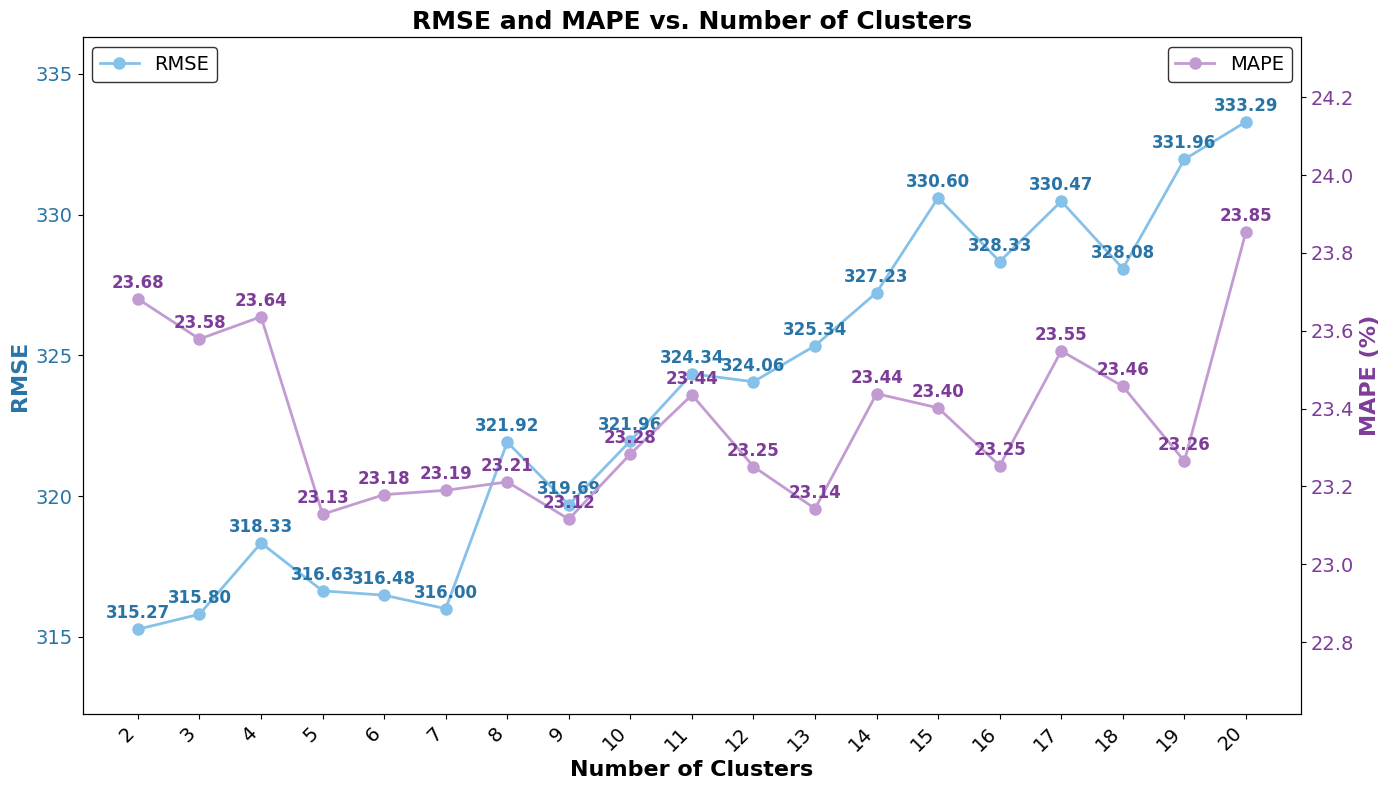

In [8]:
x = np.arange(len(cluster_range))  # Label locations

fig, ax1 = plt.subplots(figsize=(14, 8))

# Plotting RMSE
ax1.plot(x, rmse_list, label='RMSE', color='#85C1E9', marker='o', linestyle='-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters', fontsize=16, weight='bold')
ax1.set_ylabel('RMSE', fontsize=16, weight='bold', color='#2874A6')  # Darker blue for text
ax1.tick_params(axis='y', labelcolor='#2874A6', labelsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(cluster_range, rotation=45, ha='right', fontsize=14)
ax1.set_ylim(min(rmse_list) - 3, max(rmse_list) + 3)  # Adjust y-axis range based on data

# Creating a second y-axis for MAPE
ax2 = ax1.twinx()
ax2.plot(x, mape_list, label='MAPE', color='#C39BD3', marker='o', linestyle='-', linewidth=2, markersize=8)
ax2.set_ylabel('MAPE (%)', fontsize=16, weight='bold', color='#7D3C98')  # Darker purple for text
ax2.tick_params(axis='y', labelcolor='#7D3C98', labelsize=14)
ax2.set_ylim(min(mape_list) - 0.5, max(mape_list) + 0.5)  # Adjust y-axis range based on data

# Adding titles and legends
ax1.set_title('RMSE and MAPE vs. Number of Clusters', fontsize=18, weight='bold')

# Add legends with background color and increase font size
ax1_legend = ax1.legend(loc='upper left', fontsize=14, facecolor='white', framealpha=0.8, edgecolor='black')
ax2_legend = ax2.legend(loc='upper right', fontsize=14, facecolor='white', framealpha=0.8, edgecolor='black')

# Attach a text label above each point
def autolabel_line(y_values, ax, color):
    for i, v in enumerate(y_values):
        ax.annotate(f'{v:.2f}', xy=(i, v), xytext=(0, 5), textcoords="offset points", 
                    ha='center', va='bottom', fontsize=12, color=color, weight='bold')

autolabel_line(rmse_list, ax1, '#2874A6')  # Matching label color to RMSE line
autolabel_line(mape_list, ax2, '#7D3C98')  # Matching label color to MAPE line

# Adjust layout
fig.tight_layout()

# Display the plot
plt.show()


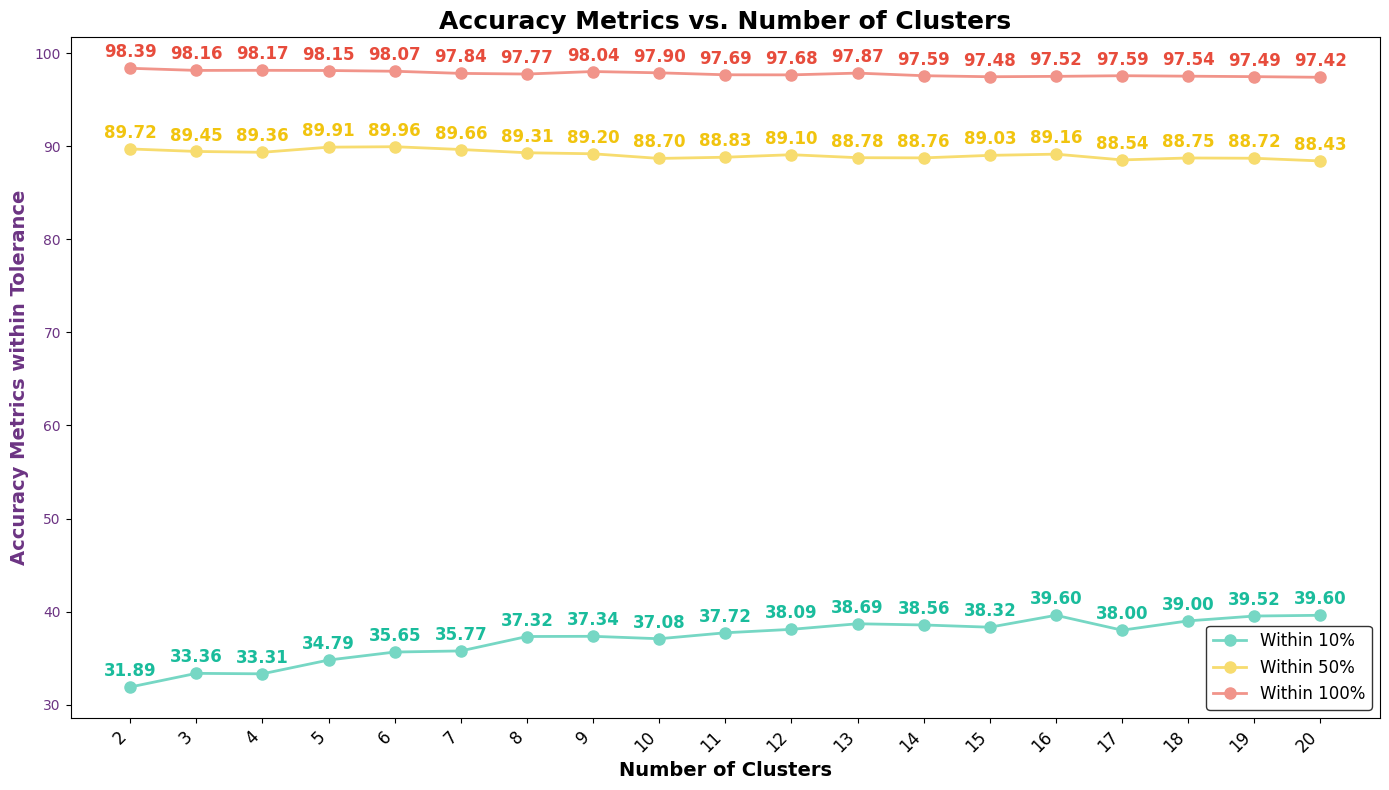

In [9]:
x = np.arange(len(cluster_range))  # Label locations

fig, ax2 = plt.subplots(figsize=(14, 8))

# Gentle color palette
color_within_10 = '#76D7C4'  # Light green
color_within_50 = '#F7DC6F'  # Light yellow
color_within_100 = '#F1948A'  # Light pink

# Plotting percentages
ax2.plot(x, within_10_list, label='Within 10%', color=color_within_10, marker='o', linestyle='-', linewidth=2, markersize=8)
ax2.plot(x, within_50_list, label='Within 50%', color=color_within_50, marker='o', linestyle='-', linewidth=2, markersize=8)
ax2.plot(x, within_100_list, label='Within 100%', color=color_within_100, marker='o', linestyle='-', linewidth=2, markersize=8)

ax2.set_xlabel('Number of Clusters', fontsize=14, weight='bold')
ax2.set_ylabel('Accuracy Metrics within Tolerance', fontsize=14, weight='bold', color='#6C3483')  # Soft purple
ax2.tick_params(axis='y', labelcolor='#6C3483')
ax2.set_xticks(x)
ax2.set_xticklabels(cluster_range, rotation=45, ha='right', fontsize=12)

# Adding titles and legends
ax2.set_title('Accuracy Metrics vs. Number of Clusters', fontsize=18, weight='bold')

# Add legend with background color and increase font size
ax2_legend = ax2.legend(loc='lower right', fontsize=12, facecolor='white', framealpha=0.8, edgecolor='black')

# Attach a text label above each point
def autolabel_line(y_values, ax, color):
    for i, v in enumerate(y_values):
        ax.annotate(f'{v:.2f}', xy=(i, v), xytext=(0, 5), textcoords="offset points", 
                    ha='center', va='bottom', fontsize=12, color=color, weight='bold')

autolabel_line(within_10_list, ax2, '#1ABC9C')  # Matching label color to line
autolabel_line(within_50_list, ax2, '#F1C40F')  # Matching label color to line
autolabel_line(within_100_list, ax2, '#E74C3C')  # Matching label color to line

# Adjust layout
fig.tight_layout()

# Display the plot
plt.show()


In [10]:
###############

Dataset c2:
Dataset c2 - Overall MSE: 98826.65
Dataset c2 - Percentage within 10%: 30.18%
Dataset c2 - Percentage within 50%: 89.72%
Dataset c2 - Percentage within 100%: 98.40%
Dataset c3:
Dataset c3 - Overall MSE: 98602.00
Dataset c3 - Percentage within 10%: 30.23%
Dataset c3 - Percentage within 50%: 89.74%
Dataset c3 - Percentage within 100%: 98.16%
Dataset c4:
Dataset c4 - Overall MSE: 98923.98
Dataset c4 - Percentage within 10%: 29.94%
Dataset c4 - Percentage within 50%: 89.52%
Dataset c4 - Percentage within 100%: 98.41%
Dataset c5:
Dataset c5 - Overall MSE: 98533.36
Dataset c5 - Percentage within 10%: 30.54%
Dataset c5 - Percentage within 50%: 89.61%
Dataset c5 - Percentage within 100%: 98.23%
Dataset c6:
Dataset c6 - Overall MSE: 98815.39
Dataset c6 - Percentage within 10%: 30.46%
Dataset c6 - Percentage within 50%: 89.71%
Dataset c6 - Percentage within 100%: 98.44%
Dataset c7:
Dataset c7 - Overall MSE: 100579.65
Dataset c7 - Percentage within 10%: 30.88%
Dataset c7 - Percentage 

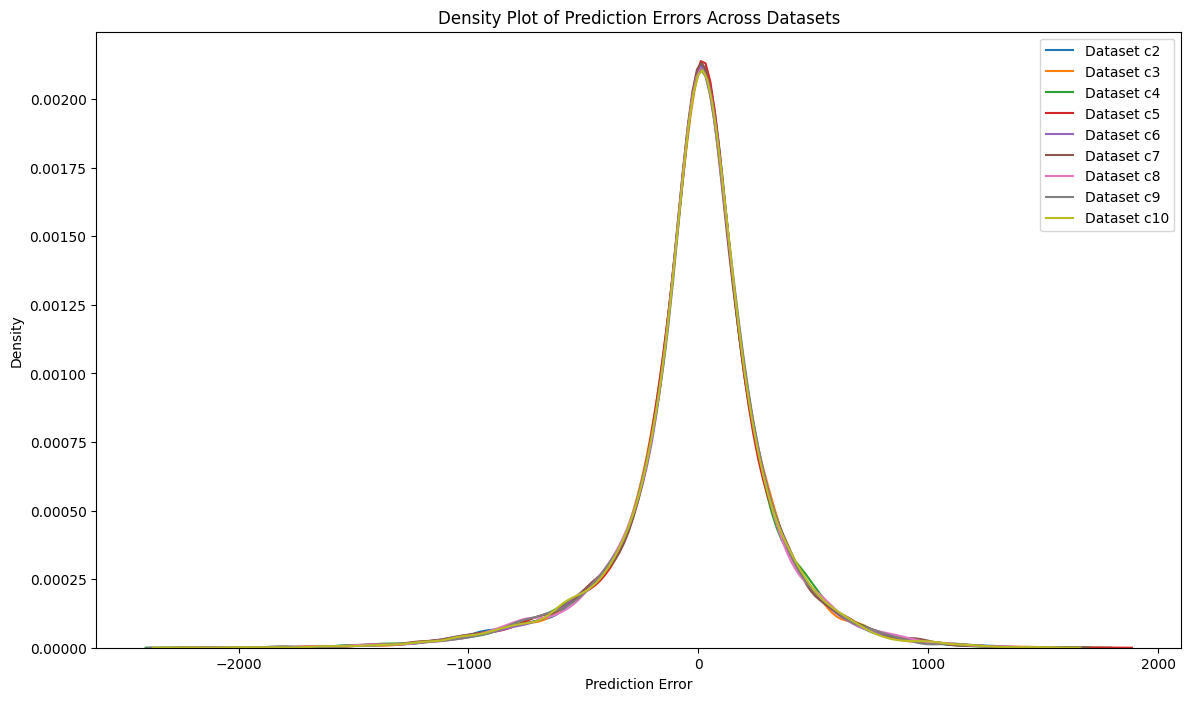

In [11]:
##### Predict clustered datasets overall as a feature

# Base path to your data files
data_path = '../13. Data from R 50000/'

# Load the datasets
X_train_base = pd.read_parquet(data_path + 'X_train_2024.parquet', engine='pyarrow')
X_test_base = pd.read_parquet(data_path + 'X_test_2024.parquet', engine='pyarrow')

# List of categorical variables
categorical_vars = ["MARITALSTATUS", "NOOFCHILDREN", "HOMEOWNERIND", "VEHICLE_LEFTORRIGHTHANDDRIVE",
                    "DRIVER1_LICENCETYPE", "DRIVER2_LICENCETYPE", "DRIVER3_LICENCETYPE", "DRIVER4_LICENCETYPE",
                    "DRIVER1_OTHERVEHICLEOWNEDIND", "DRIVER2_OTHERVEHICLEOWNEDIND", "DRIVER3_OTHERVEHICLEOWNEDIND",
                    "DRIVER4_OTHERVEHICLEOWNEDIND", "MONTHLYPAYMENTSIND", "VEHICLE_USE_TYPE", "VEHICLEOVERNIGHTLOCATION",
                    "VEHICLE_OWNERSHIP", "VEHICLE_MODIFIEDIND", "VEHICLE_BODYTYPE", "VEHICLE_FUELTYPE",
                    "VEHICLE_TRANSMISSIONTYPE", "INDICATOR_NRCONVICTIONS_RECENT", "INDICATOR_CLAIMSCOUNT_RECENT"]

# Define numerical columns by excluding categorical ones
numerical_vars = [col for col in X_train_base.columns if col not in categorical_vars]

# Initialize a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the numerical columns of X_train_base and transform X_train_base and X_test_base
X_train_base[numerical_vars] = scaler.fit_transform(X_train_base[numerical_vars])
X_test_base[numerical_vars] = scaler.transform(X_test_base[numerical_vars])

# Load y_train and y_test
y_train = pd.read_parquet(data_path + 'y_train_2024.parquet').iloc[:, 0]
y_test = pd.read_parquet(data_path + 'y_test_2024.parquet').iloc[:, 0]

# Initialize storage for dataset-wide models
dataset_model_store = {}
dataset_predictions = {}
dataset_errors = {}
dataset_mse = {}

# Initialize storage for metrics
dataset_within_10 = {}
dataset_within_50 = {}
dataset_within_100 = {}

# Prepare to plot all density curves in one figure
plt.figure(figsize=(14, 8))

# Processing datasets
for i in range(2, 11):  # Loop from 2 to 10
    X_train = X_train_base.copy()
    X_test = X_test_base.copy()

    # Load the additional datasets
    X_train_additional = pd.read_parquet(f'{data_path}X_train_proto_c{i}_seed_2024.parquet')
    X_test_additional = pd.read_parquet(f'{data_path}X_test_proto_c{i}_seed_2024.parquet')

    # Append the last columns to the main datasets
    X_train[f'additional_feature_{i}'] = X_train_additional.iloc[:, -1]
    X_test[f'additional_feature_{i}'] = X_test_additional.iloc[:, -1]

    # Train and predict with XGBoost on the entire dataset (not split by additional feature)
    model = XGBRegressor(random_state=2024)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Store dataset-wide results
    dataset_model_store[i] = model
    dataset_predictions[i] = y_pred
    errors = y_pred - y_test
    dataset_errors[i] = errors
    dataset_mse[i] = mean_squared_error(y_test, y_pred)
    sns.kdeplot(errors, label=f'Dataset c{i}')

    # Calculate metrics
    dataset_within_10[i] = calculate_within_tolerance(y_test, y_pred, 0.10)
    dataset_within_50[i] = calculate_within_tolerance(y_test, y_pred, 0.50)
    dataset_within_100[i] = calculate_within_tolerance(y_test, y_pred, 1.00)

    # Print metrics
    print(f"Dataset c{i}:")
    print(f"Dataset c{i} - Overall MSE: {dataset_mse[i]:.2f}")
    print(f"Dataset c{i} - Percentage within 10%: {dataset_within_10[i]:.2f}%")
    print(f"Dataset c{i} - Percentage within 50%: {dataset_within_50[i]:.2f}%")
    print(f"Dataset c{i} - Percentage within 100%: {dataset_within_100[i]:.2f}%")

    # # Plotting the density curve of the dataset-wide prediction errors
    # plt.figure(figsize=(10, 6))
    # sns.kdeplot(errors, label=f'Overall Dataset c{i}')
    # plt.title(f'Density Plot of Prediction Errors for Dataset c{i}')
    # plt.xlabel('Prediction Error')
    # plt.ylabel('Density')
    # plt.legend()
    # plt.show()

# Finalize the plot
plt.title('Density Plot of Prediction Errors Across Datasets')
plt.xlabel('Prediction Error')
plt.ylabel('Density')
plt.legend()
plt.show()


In [12]:
##### Extra information in figures in below

Overall CV of y_train: 67.81%
Dataset 2, Cluster 1 - CV: 67.06% (Overall CV: 67.81%)
Dataset 2, Cluster 1:
  MSE: 86177.65
  MAE: 193.92
  RMSE: 293.56
  MAPE: 23.28%
  RMSPE: 32.58%
  R^2: 0.76
Dataset 2, Cluster 2 - CV: 60.89% (Overall CV: 67.81%)
Dataset 2, Cluster 2:
  MSE: 144533.53
  MAE: 261.23
  RMSE: 380.18
  MAPE: 25.04%
  RMSPE: 38.53%
  R^2: 0.77

Overall Metrics for Dataset 2:
  MSE: 99395.26
  MAE: 209.17
  RMSE: 315.27
  MAPE: 23.68%
  RMSPE: 34.02%
  R^2: 0.77
  Percentage within 10%: 31.89%
  Percentage within 50%: 89.72%
  Percentage within 100%: 98.39%
Dataset 3, Cluster 1 - CV: 64.12% (Overall CV: 67.81%)
Dataset 3, Cluster 1:
  MSE: 60001.95
  MAE: 152.51
  RMSE: 244.95
  MAPE: 21.77%
  RMSPE: 30.69%
  R^2: 0.73
Dataset 3, Cluster 2 - CV: 58.95% (Overall CV: 67.81%)
Dataset 3, Cluster 2:
  MSE: 128250.57
  MAE: 252.75
  RMSE: 358.12
  MAPE: 24.95%
  RMSPE: 35.99%
  R^2: 0.74
Dataset 3, Cluster 3 - CV: 61.70% (Overall CV: 67.81%)
Dataset 3, Cluster 3:
  MSE: 152654.

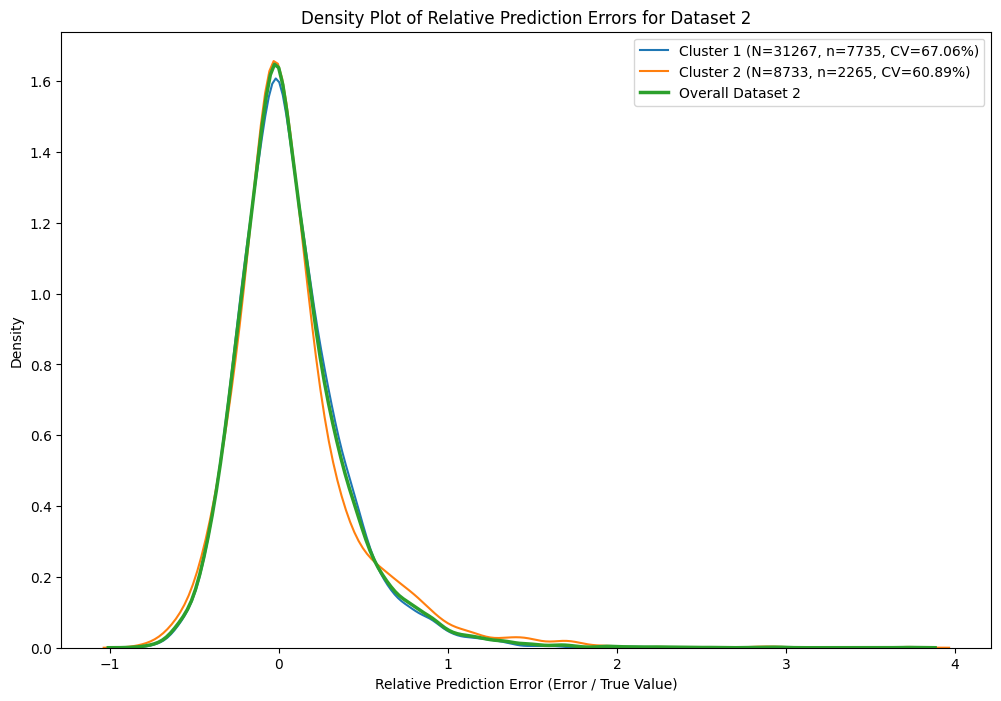

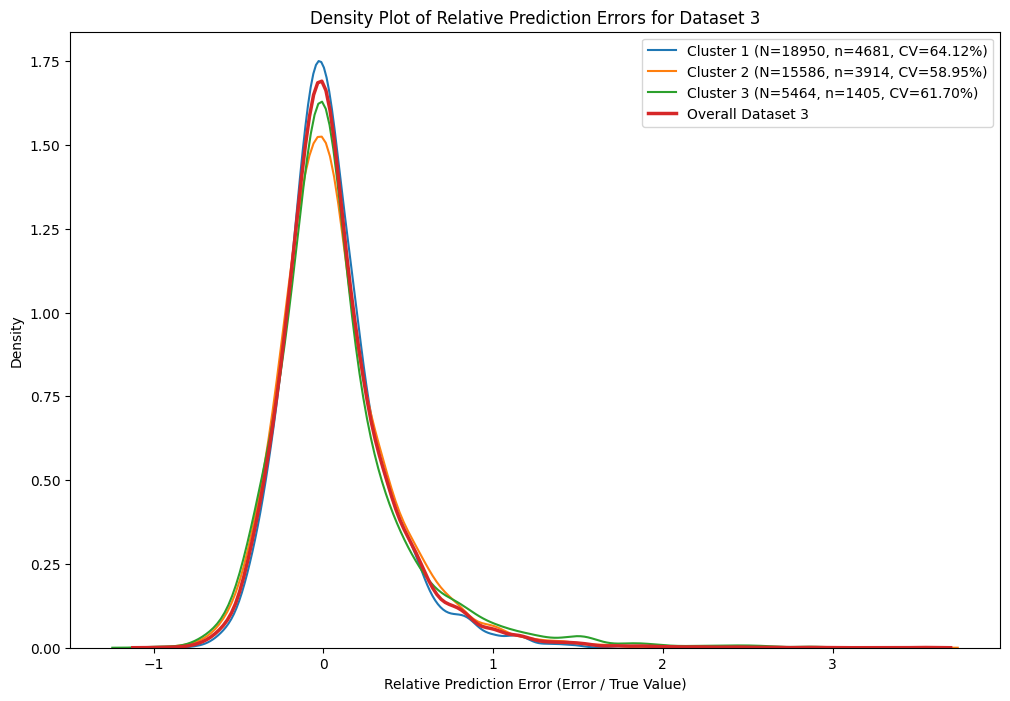

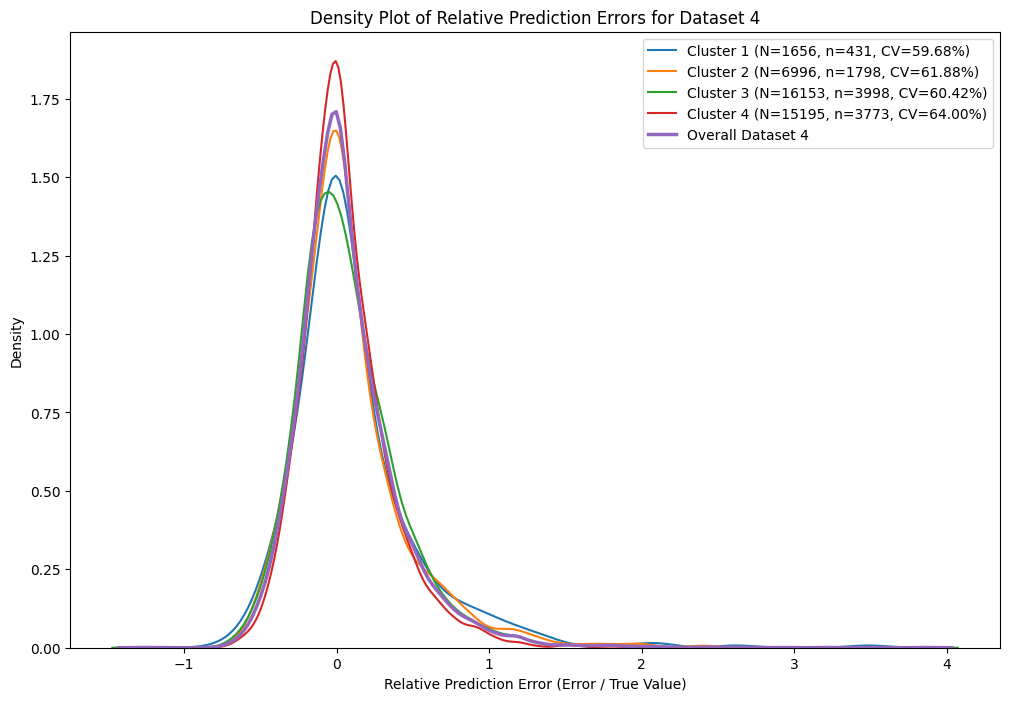

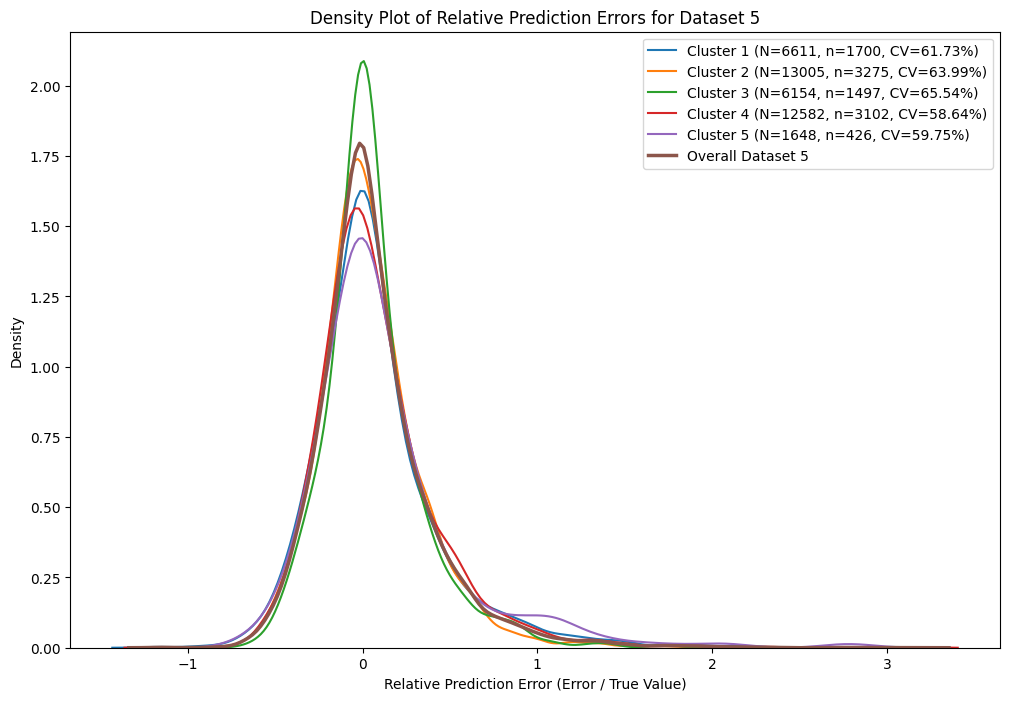

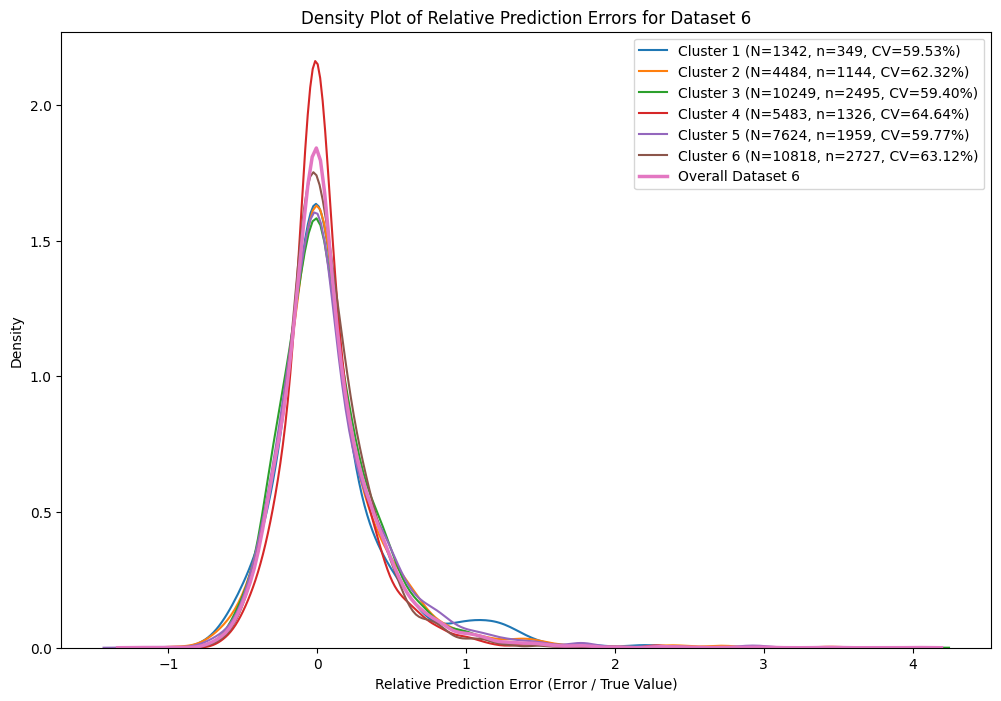

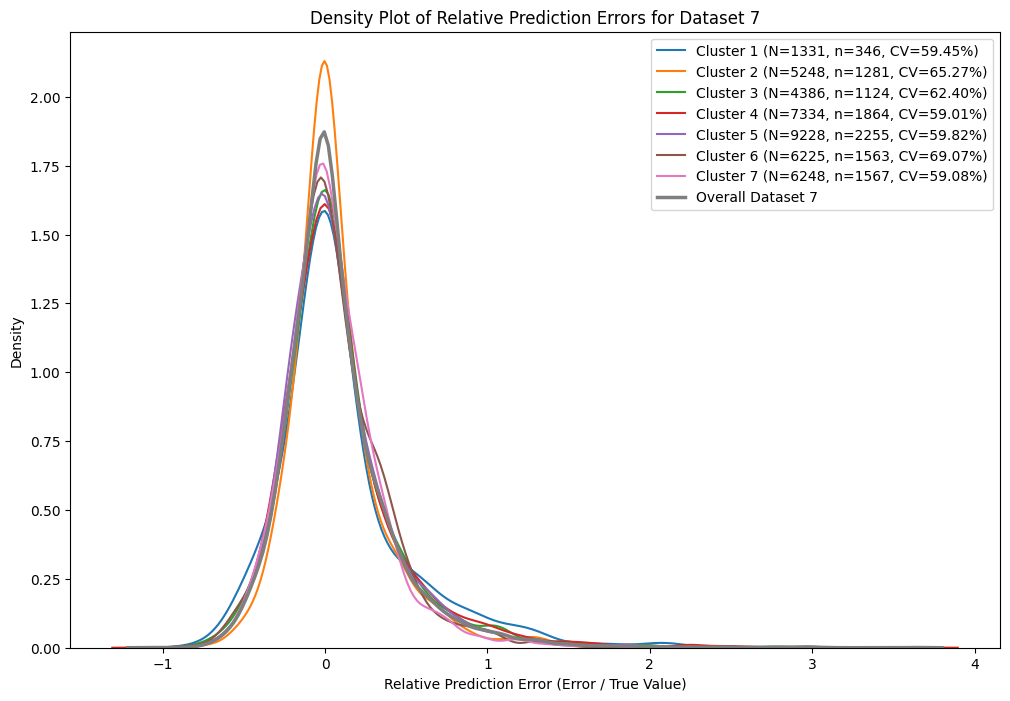

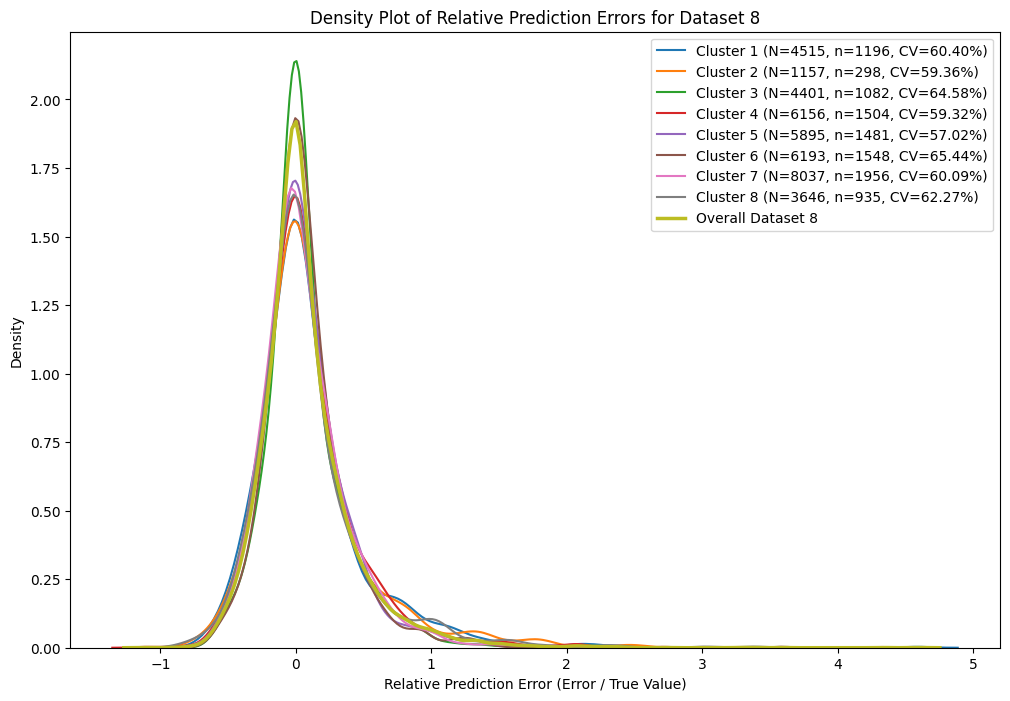

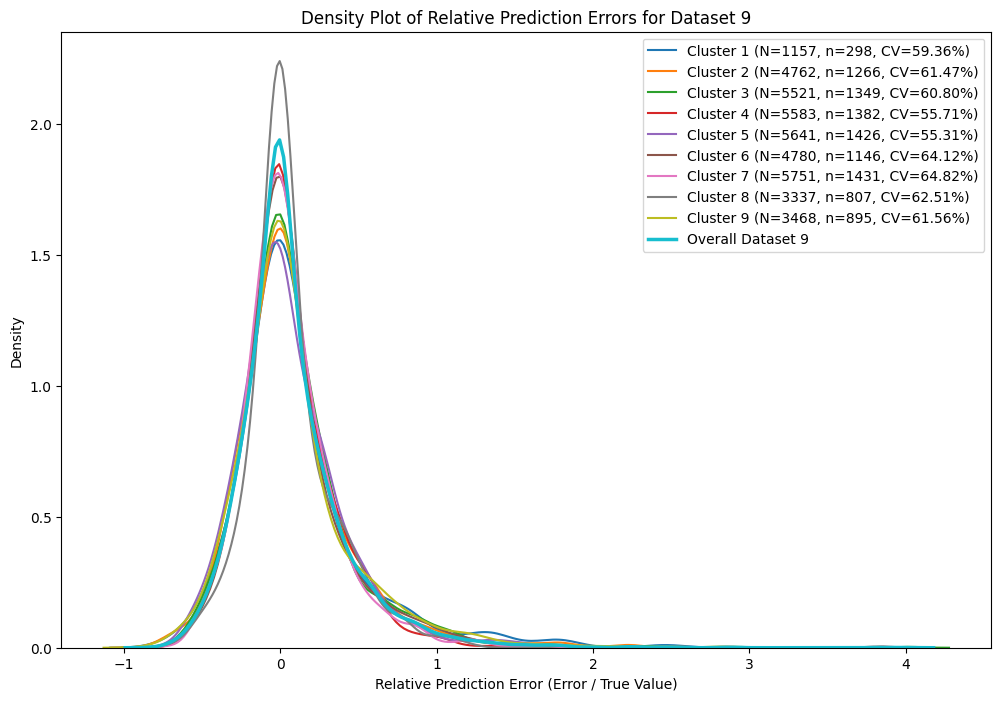

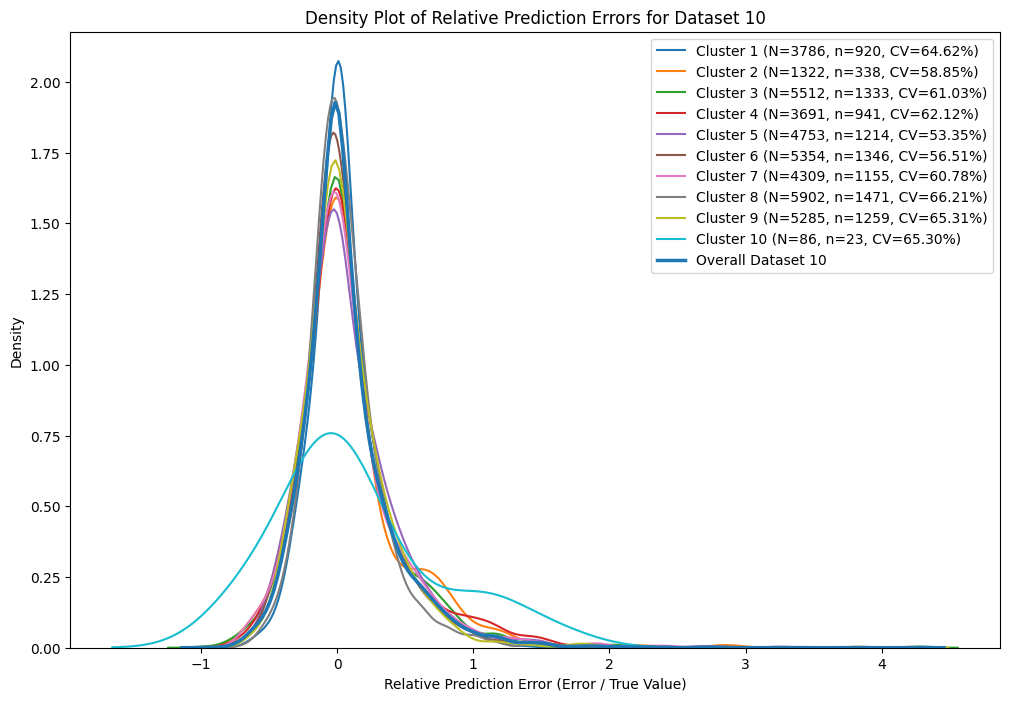

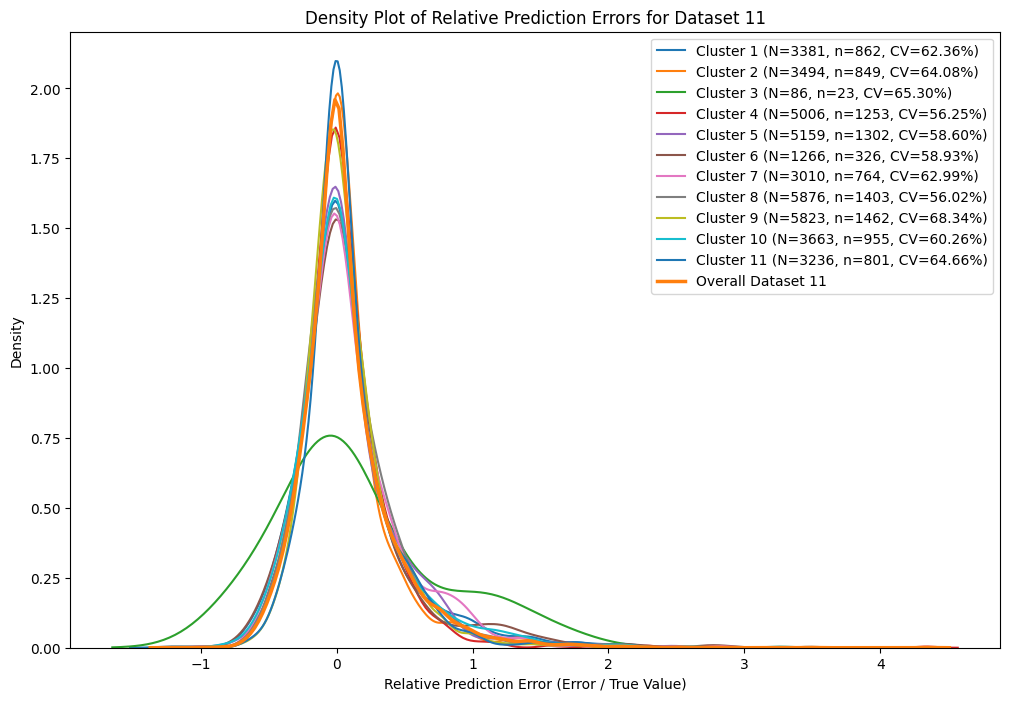

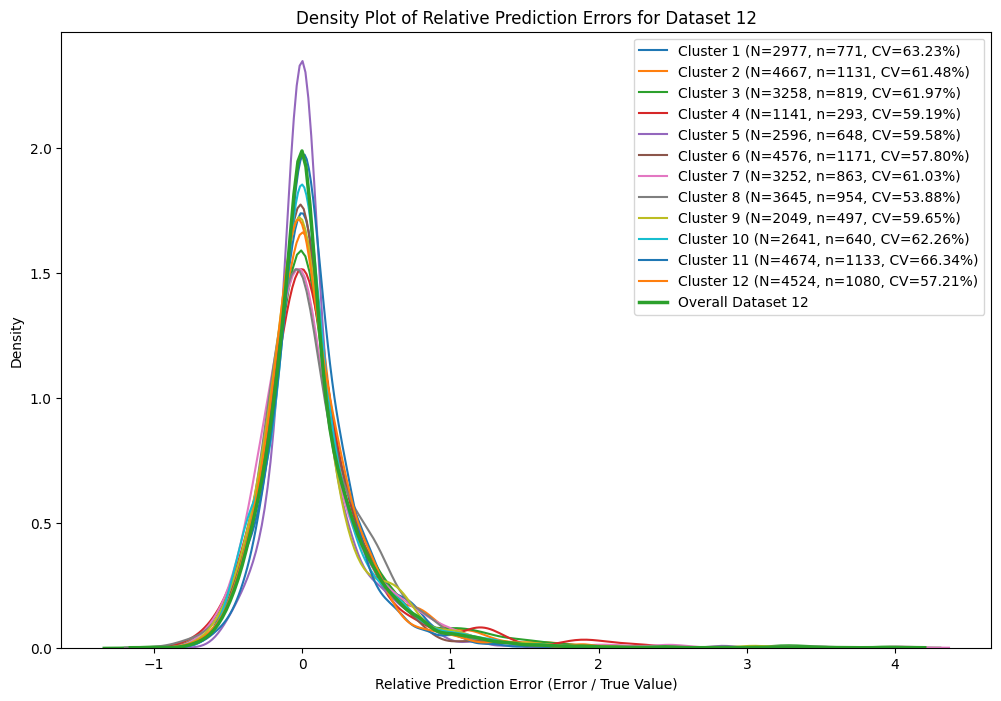

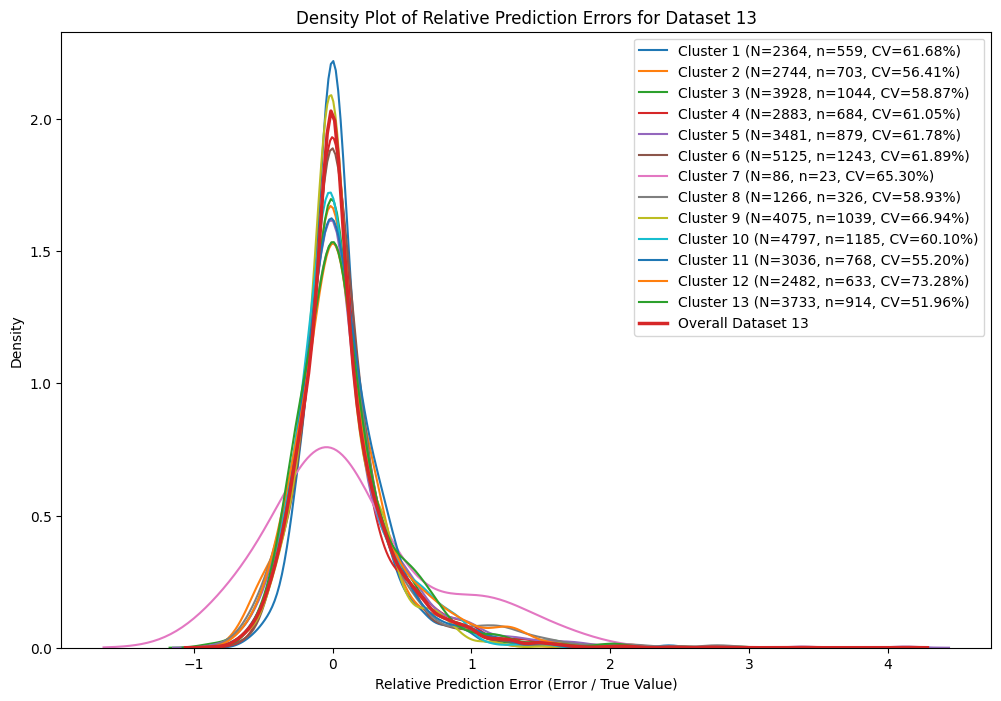

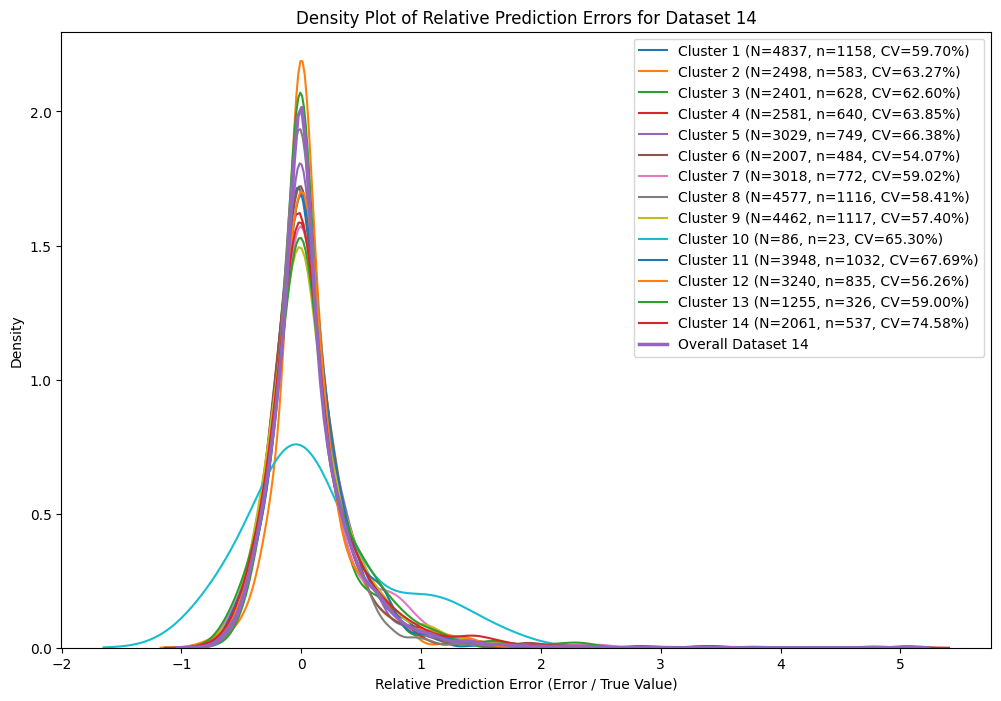

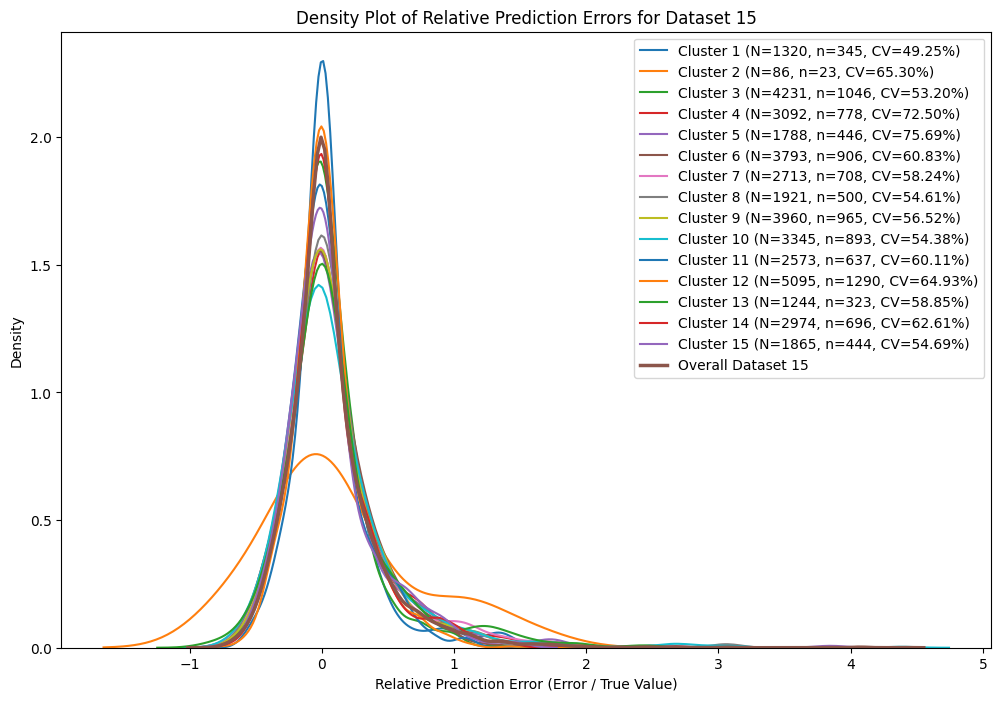

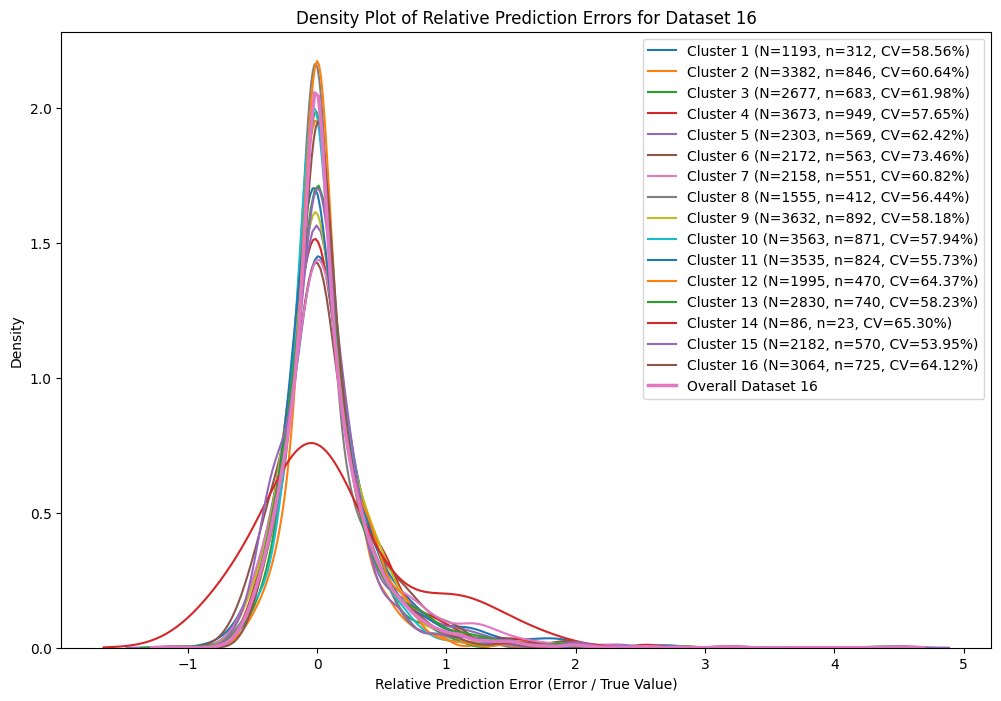

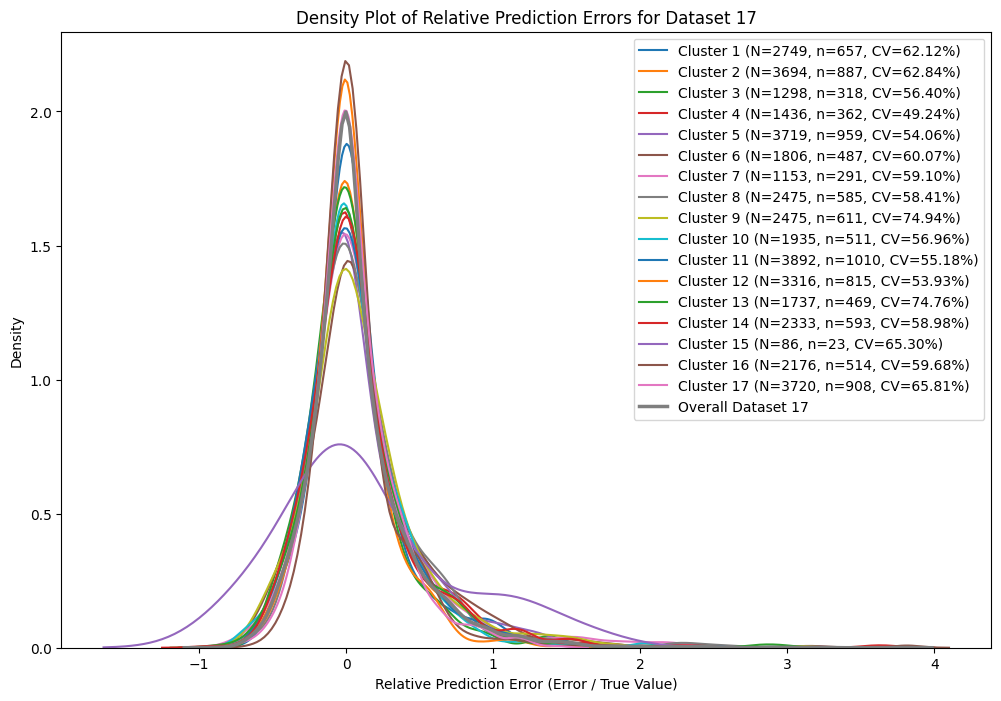

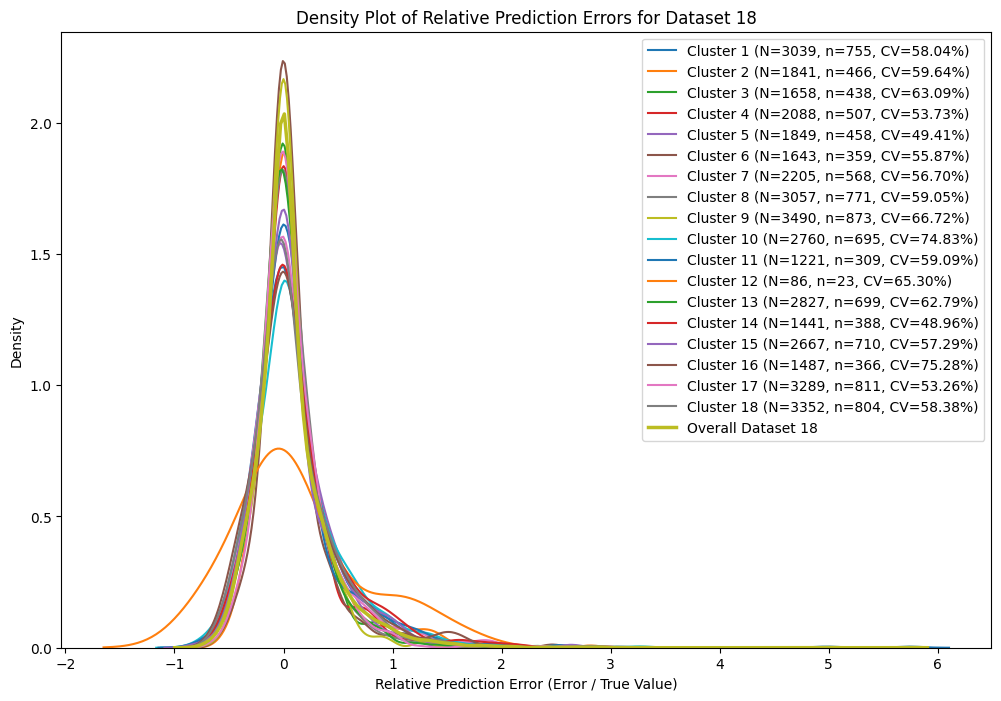

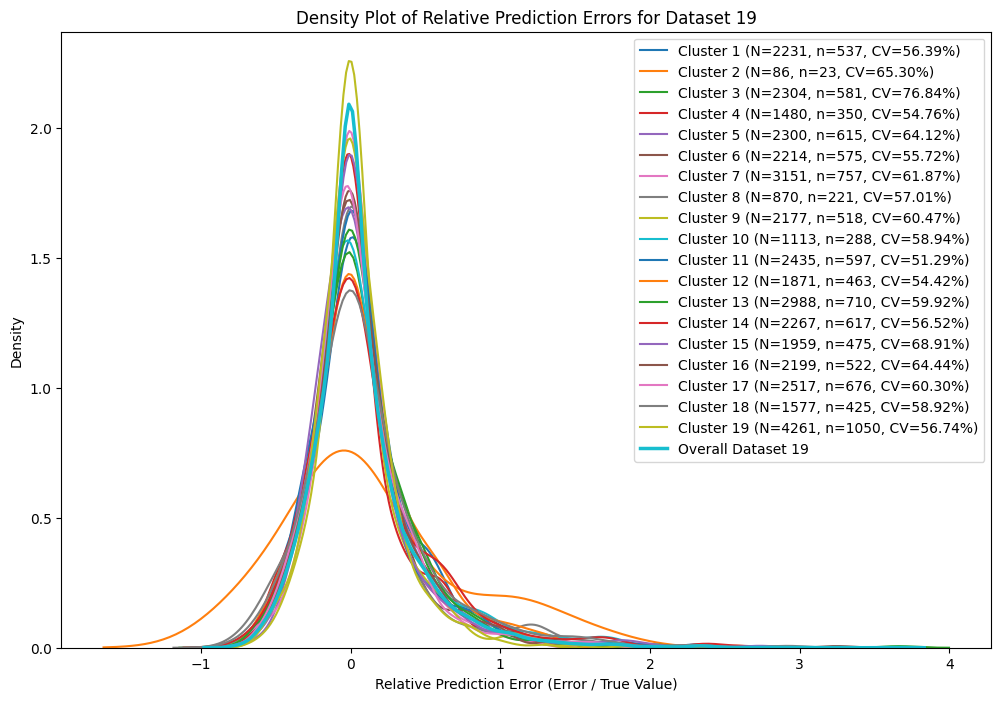

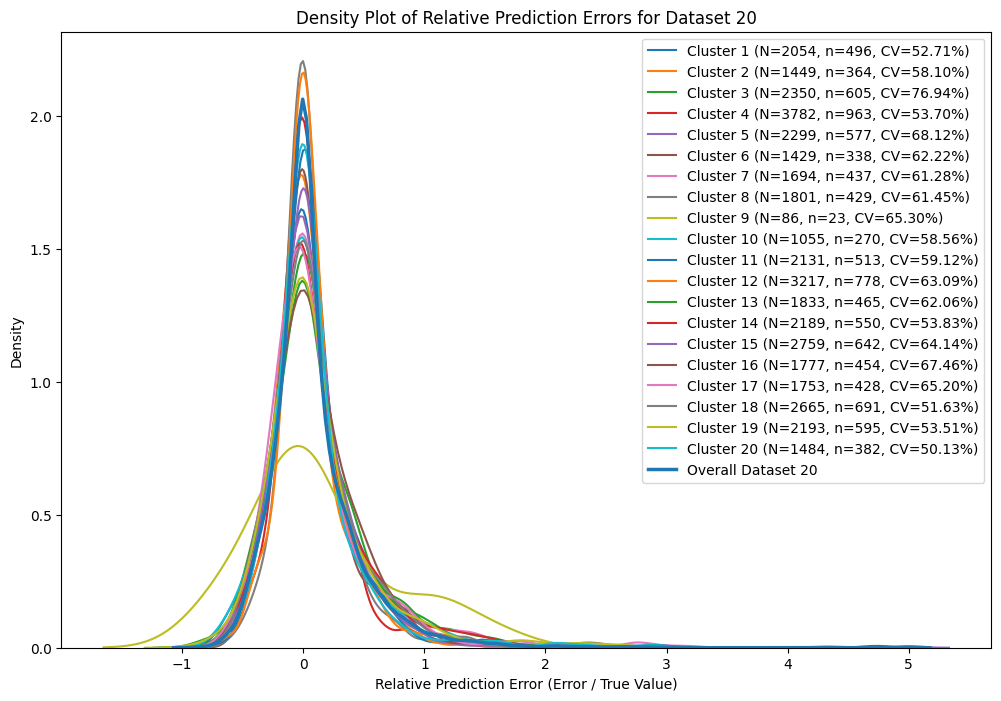

In [13]:
# Load the datasets
data_path = '../13. Data from R 50000/'
X_train = pd.read_parquet(data_path + 'X_train_2024.parquet', engine='pyarrow')
X_test = pd.read_parquet(data_path + 'X_test_2024.parquet', engine='pyarrow')
seed_num = 2024

# Load y_train and y_test
y_train = pd.read_parquet(data_path + 'y_train_2024.parquet').iloc[:, 0]
y_test = pd.read_parquet(data_path + 'y_test_2024.parquet').iloc[:, 0]

# List of categorical variables
categorical_vars = [
    "MARITALSTATUS", "NOOFCHILDREN", "HOMEOWNERIND", "VEHICLE_LEFTORRIGHTHANDDRIVE",
    "DRIVER1_LICENCETYPE", "DRIVER2_LICENCETYPE", "DRIVER3_LICENCETYPE", "DRIVER4_LICENCETYPE",
    "DRIVER1_OTHERVEHICLEOWNEDIND", "DRIVER2_OTHERVEHICLEOWNEDIND", "DRIVER3_OTHERVEHICLEOWNEDIND",
    "DRIVER4_OTHERVEHICLEOWNEDIND", "MONTHLYPAYMENTSIND", "VEHICLE_USE_TYPE", "VEHICLEOVERNIGHTLOCATION",
    "VEHICLE_OWNERSHIP", "VEHICLE_MODIFIEDIND", "VEHICLE_BODYTYPE", "VEHICLE_FUELTYPE",
    "VEHICLE_TRANSMISSIONTYPE", "INDICATOR_NRCONVICTIONS_RECENT", "INDICATOR_CLAIMSCOUNT_RECENT"
]

# Define numerical columns by excluding categorical ones
numerical_vars = [col for col in X_train.columns if col not in categorical_vars]

# Calculate overall CV of y_train
overall_cv = np.std(y_train) / np.mean(y_train) * 100
print(f"Overall CV of y_train: {overall_cv:.2f}%")

# Dictionaries to store models, predictions, errors, subset sizes, and CVs
model_store = {}
prediction_store = {}
errors_store = {}
subset_sizes = {}
cv_store = {}
train_subset_sizes = {}

# Initialize lists to store the combined true values and predictions across all datasets
all_y_test_global = []
all_y_pred_global = []

# Function to calculate percentage within tolerance
def calculate_within_tolerance(y_true, y_pred, tolerance):
    within_tolerance = abs(y_true - y_pred) / y_true <= tolerance
    percentage_within_tolerance = within_tolerance.mean() * 100
    return percentage_within_tolerance

# Processing datasets
for i in range(2, 21):  # Loop from 2 to 20 clusters
    X_train_additional = pd.read_parquet(f'{data_path}X_train_proto_c{i}_seed_2024.parquet')
    X_test_additional = pd.read_parquet(f'{data_path}X_test_proto_c{i}_seed_2024.parquet')
    
    # Append the last columns to the main datasets
    X_train[f'additional_feature_{i}'] = X_train_additional.iloc[:, -1]
    X_test[f'additional_feature_{i}'] = X_test_additional.iloc[:, -1]

    # Initialize error storage for this dataset
    errors_store[i] = {}
    subset_sizes[i] = {}
    cv_store[i] = {}
    train_subset_sizes[i] = {}
    
    # Unique values in the 'additional_feature' column
    unique_values = np.sort(X_train[f'additional_feature_{i}'].unique())

    # Initialize lists to store the combined true values and predictions for this dataset
    dataset_y_test = []
    dataset_y_pred = []
    
    # Initialize metrics lists
    mse_list = []
    mae_list = []
    rmse_list = []
    mape_list = []
    rmspe_list = []
    r2_list = []
    segment_sizes = []

    for value in unique_values:
        # Split the data by 'additional_feature'
        X_train_subset = X_train[X_train[f'additional_feature_{i}'] == value]
        X_test_subset = X_test[X_test[f'additional_feature_{i}'] == value]
        y_train_subset = y_train[X_train[f'additional_feature_{i}'] == value]
        y_test_subset = y_test[X_test[f'additional_feature_{i}'] == value]

        # Calculate CV for the current segment in training data
        segment_cv = np.std(y_train_subset) / np.mean(y_train_subset) * 100
        cv_store[i][value] = segment_cv
        train_subset_sizes[i][value] = len(y_train_subset)

        print(f"Dataset {i}, Cluster {value} - CV: {segment_cv:.2f}% (Overall CV: {overall_cv:.2f}%)")

        # Initialize and train the XGBoost model
        model = XGBRegressor(random_state=2024)
        model.fit(X_train_subset.drop(columns=[f'additional_feature_{i}']), y_train_subset)
        model_store[(i, value)] = model

        # Predict on the corresponding test set
        y_pred_subset = model.predict(X_test_subset.drop(columns=[f'additional_feature_{i}']))
        prediction_store[(i, value)] = y_pred_subset

        # Combine predictions and true values for this dataset
        dataset_y_test.extend(y_test_subset.tolist())
        dataset_y_pred.extend(y_pred_subset.tolist())

        # Calculate relative prediction error for this subset
        relative_errors = (y_pred_subset - y_test_subset) / y_test_subset
        errors_store[i][value] = relative_errors
        subset_sizes[i][value] = len(y_test_subset)
        
        # Append metrics and segment size to lists
        mse = mean_squared_error(y_test_subset, y_pred_subset)
        mae = mean_absolute_error(y_test_subset, y_pred_subset)
        rmse = np.sqrt(mse)
        mape = np.mean(np.abs((y_test_subset - y_pred_subset) / y_test_subset)) * 100
        rmspe = np.sqrt(np.mean(np.square((y_test_subset - y_pred_subset) / y_test_subset))) * 100
        r2 = r2_score(y_test_subset, y_pred_subset)

        mse_list.append(mse)
        mae_list.append(mae)
        rmse_list.append(rmse)
        mape_list.append(mape)
        rmspe_list.append(rmspe)
        r2_list.append(r2)
        segment_sizes.append(len(y_test_subset))

        # Print metrics for each subset
        print(f"Dataset {i}, Cluster {value}:")
        print(f"  MSE: {mse:.2f}")
        print(f"  MAE: {mae:.2f}")
        print(f"  RMSE: {rmse:.2f}")
        print(f"  MAPE: {mape:.2f}%")
        print(f"  RMSPE: {rmspe:.2f}%")
        print(f"  R^2: {r2:.2f}")

    # Convert combined lists to numpy arrays for overall evaluation for this dataset
    dataset_y_test = np.array(dataset_y_test)
    dataset_y_pred = np.array(dataset_y_pred)

    # Combine the current dataset predictions with the global lists
    all_y_test_global.extend(dataset_y_test)
    all_y_pred_global.extend(dataset_y_pred)

    # Calculate overall metrics for the current dataset
    overall_mse = mean_squared_error(dataset_y_test, dataset_y_pred)
    overall_mae = mean_absolute_error(dataset_y_test, dataset_y_pred)
    overall_rmse = np.sqrt(overall_mse)
    overall_mape = np.mean(np.abs((dataset_y_test - dataset_y_pred) / dataset_y_test)) * 100
    overall_rmspe = np.sqrt(np.mean(np.square((dataset_y_test - dataset_y_pred) / dataset_y_test))) * 100
    overall_r2 = r2_score(dataset_y_test, dataset_y_pred)

    # Calculate percentage within tolerance for the current dataset
    overall_within_10 = calculate_within_tolerance(dataset_y_test, dataset_y_pred, 0.10)
    overall_within_50 = calculate_within_tolerance(dataset_y_test, dataset_y_pred, 0.50)
    overall_within_100 = calculate_within_tolerance(dataset_y_test, dataset_y_pred, 1.00)

    # Add overall dataset differences for plotting (optional)
    errors_store[i]['overall'] = (dataset_y_pred - dataset_y_test) / dataset_y_test

    # Display overall metrics for the current dataset
    print(f"\nOverall Metrics for Dataset {i}:")
    print(f"  MSE: {overall_mse:.2f}")
    print(f"  MAE: {overall_mae:.2f}")
    print(f"  RMSE: {overall_rmse:.2f}")
    print(f"  MAPE: {overall_mape:.2f}%")
    print(f"  RMSPE: {overall_rmspe:.2f}%")
    print(f"  R^2: {overall_r2:.2f}")
    print(f"  Percentage within 10%: {overall_within_10:.2f}%")
    print(f"  Percentage within 50%: {overall_within_50:.2f}%")
    print(f"  Percentage within 100%: {overall_within_100:.2f}%")

# Plotting density curves of relative prediction errors for each dataset
for i in errors_store:
    plt.figure(figsize=(12, 8))
    sorted_clusters = sorted(errors_store[i].keys(), key=lambda x: int(x) if x != 'overall' else float('inf'))  # Sort by cluster number
    for value in sorted_clusters:
        if value == 'overall':
            sns.kdeplot(errors_store[i][value], label=f'Overall Dataset {i}', linewidth=2.5)
        else:
            sns.kdeplot(errors_store[i][value], label=f'Cluster {value} (N={train_subset_sizes[i][value]}, n={subset_sizes[i][value]}, CV={cv_store[i][value]:.2f}%)')
    plt.title(f'Density Plot of Relative Prediction Errors for Dataset {i}')
    plt.xlabel('Relative Prediction Error (Error / True Value)')
    plt.ylabel('Density')
    plt.legend()
    plt.show()


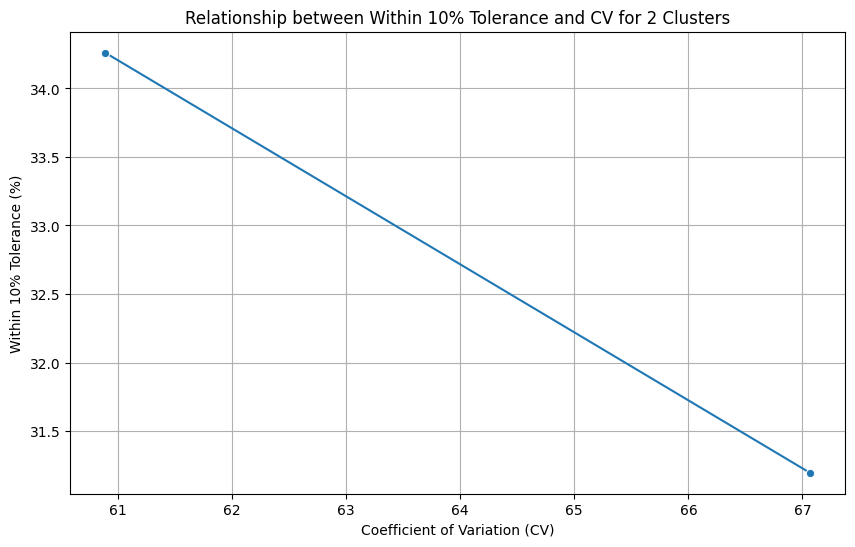

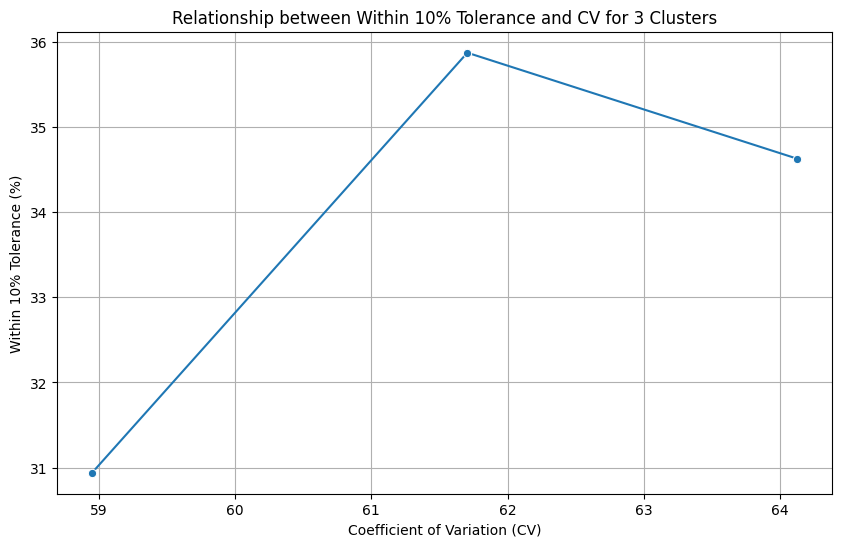

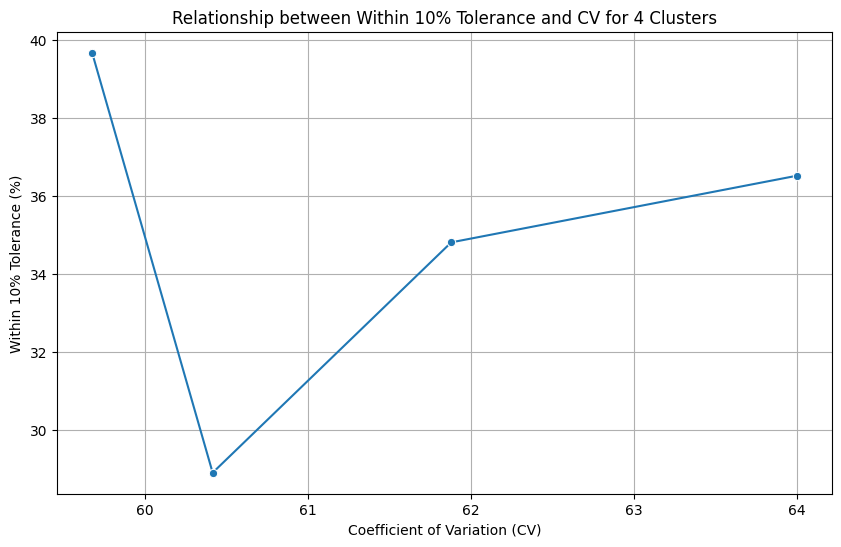

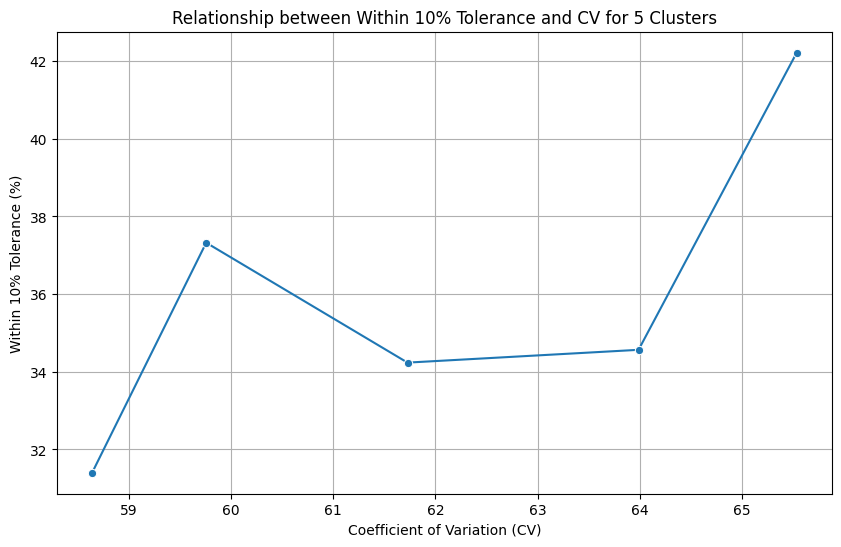

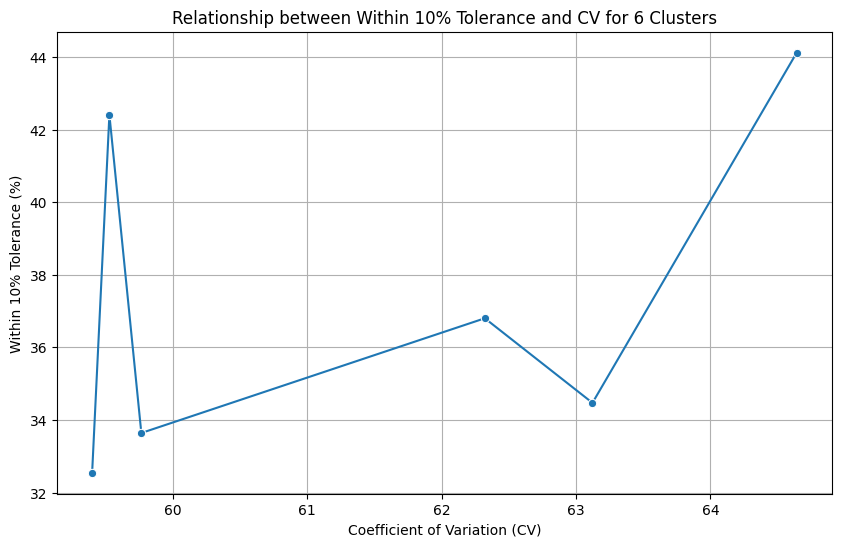

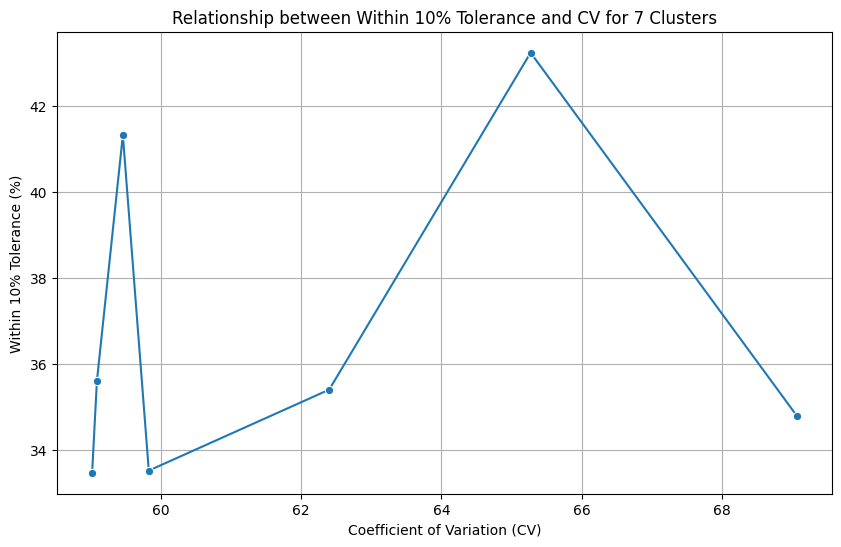

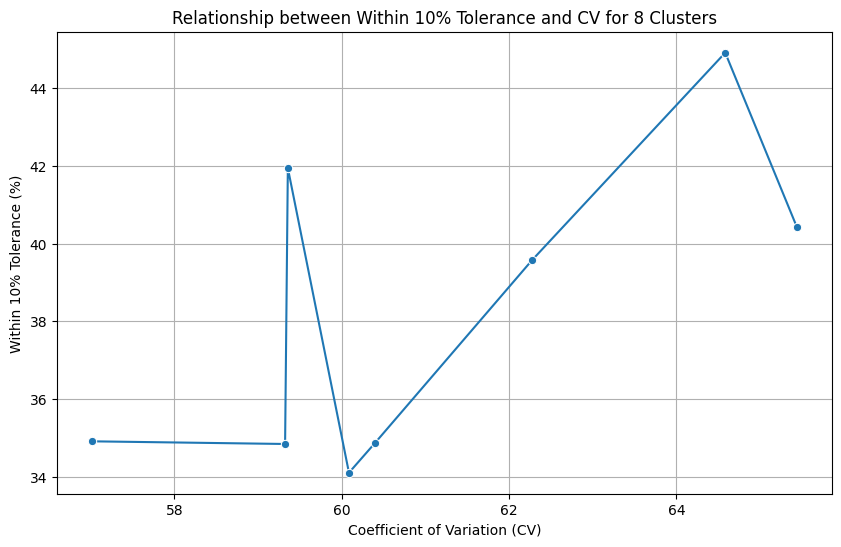

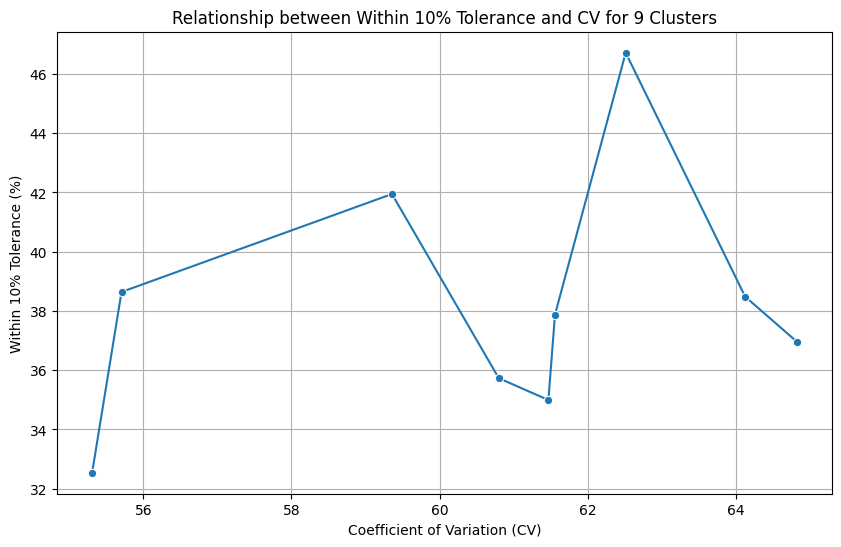

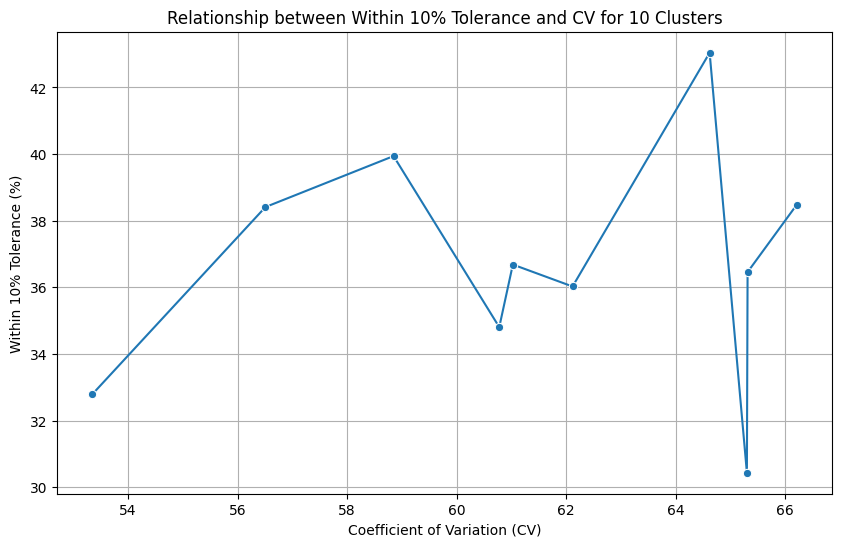

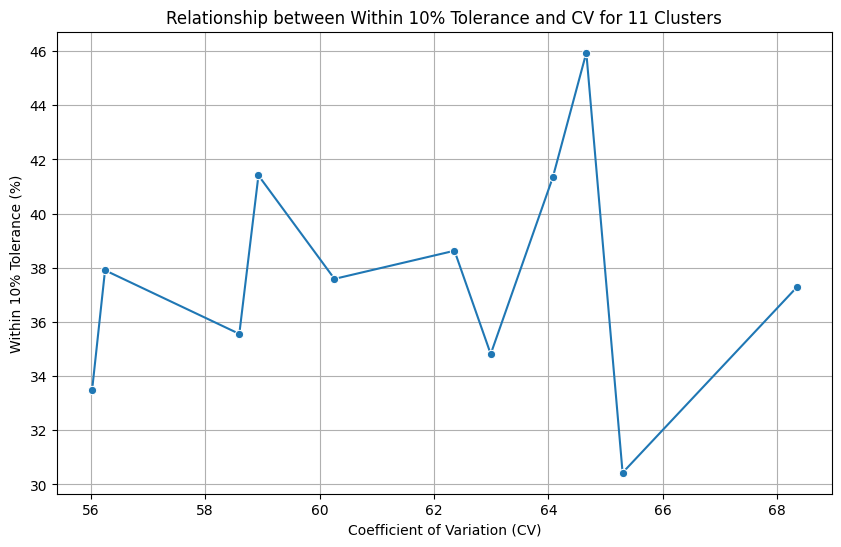

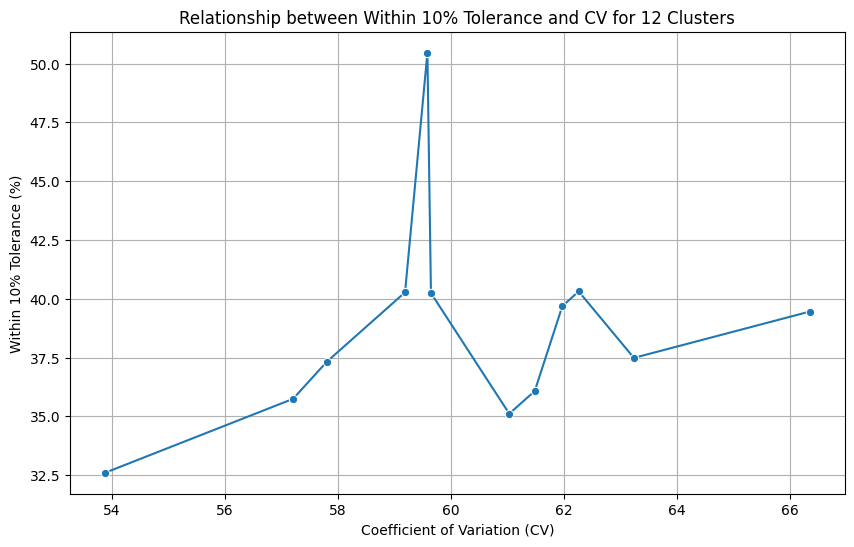

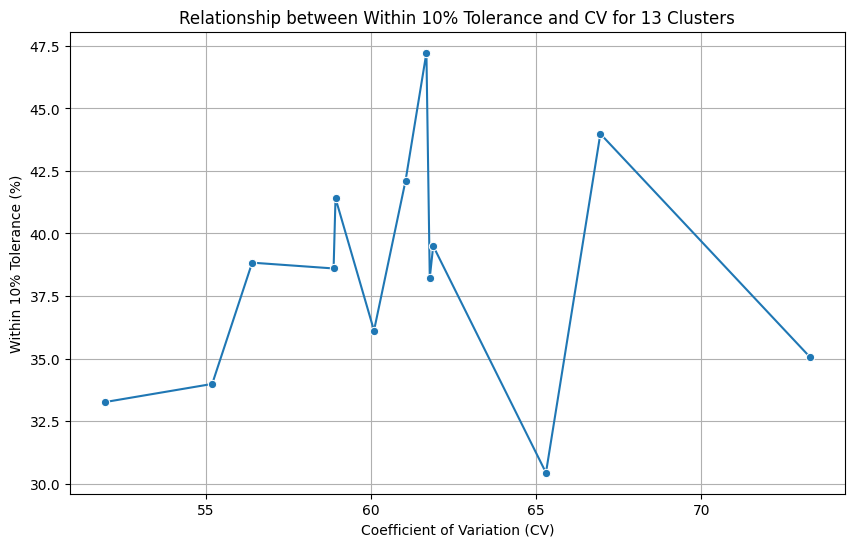

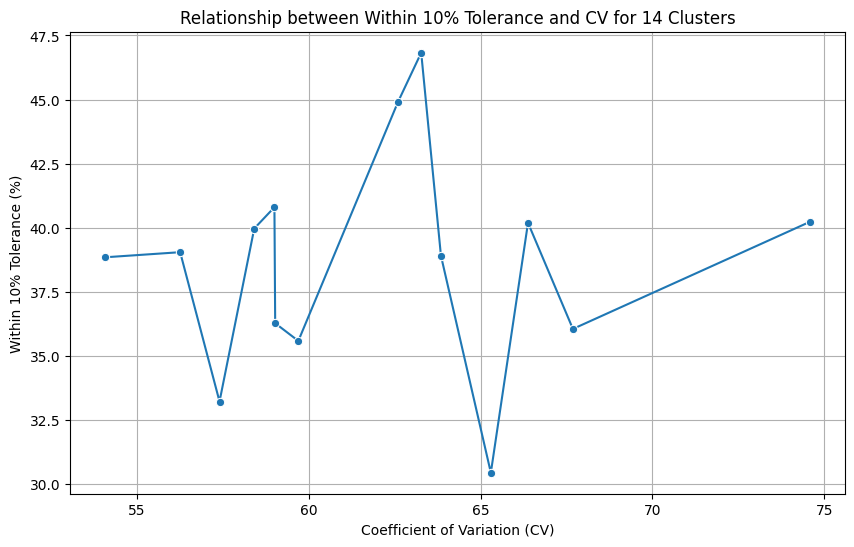

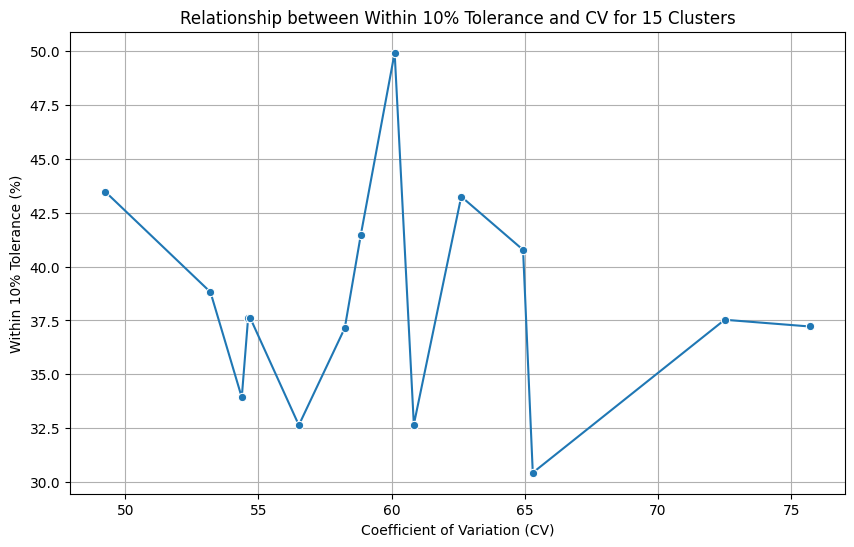

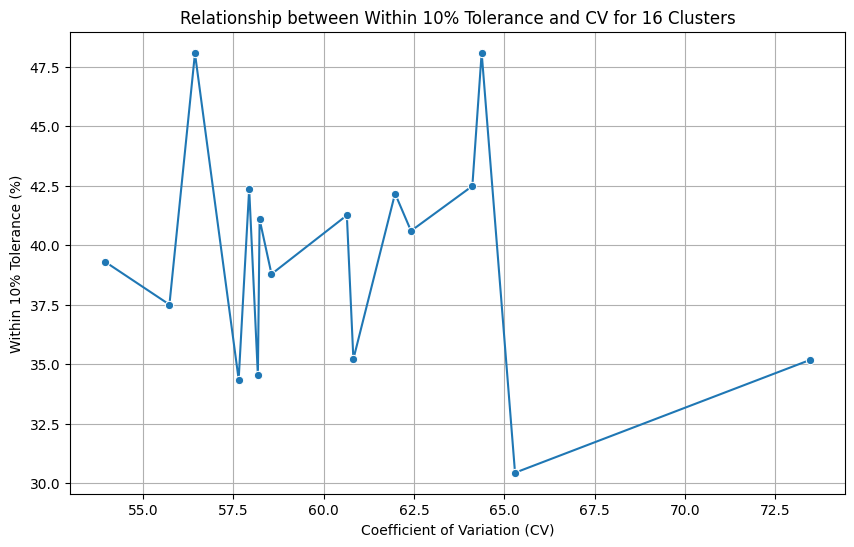

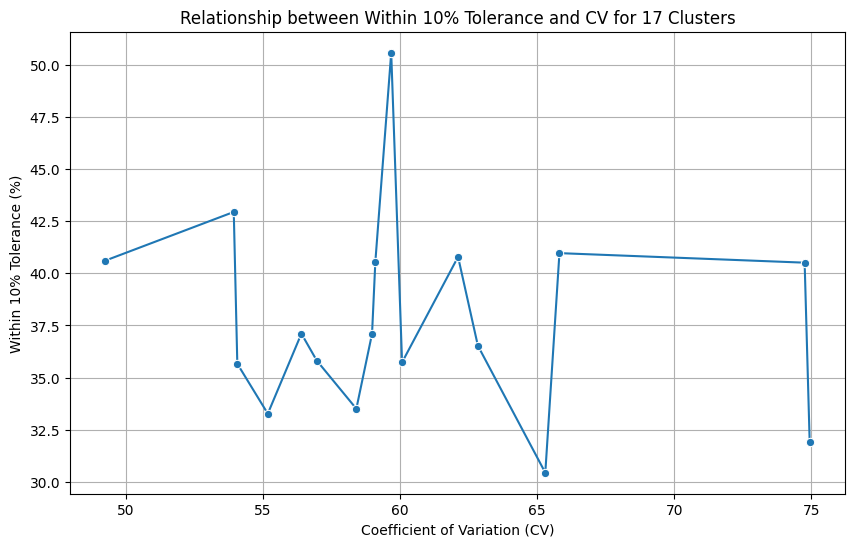

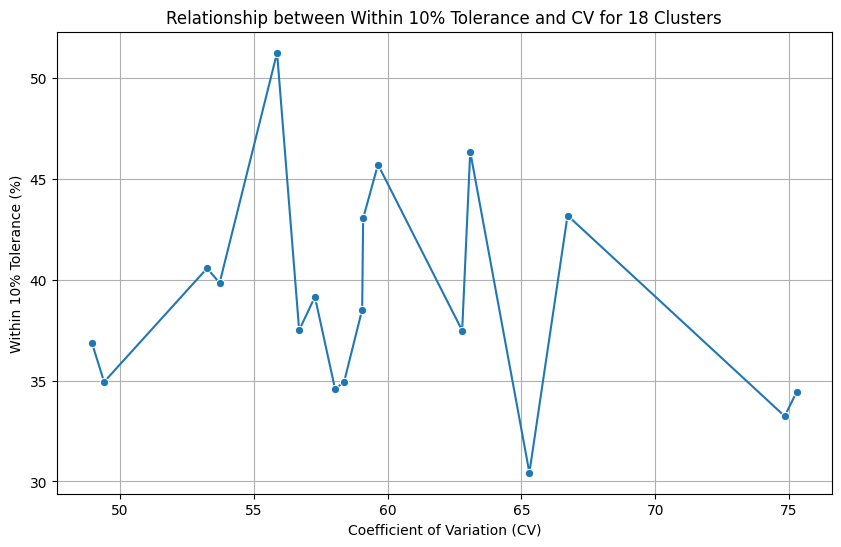

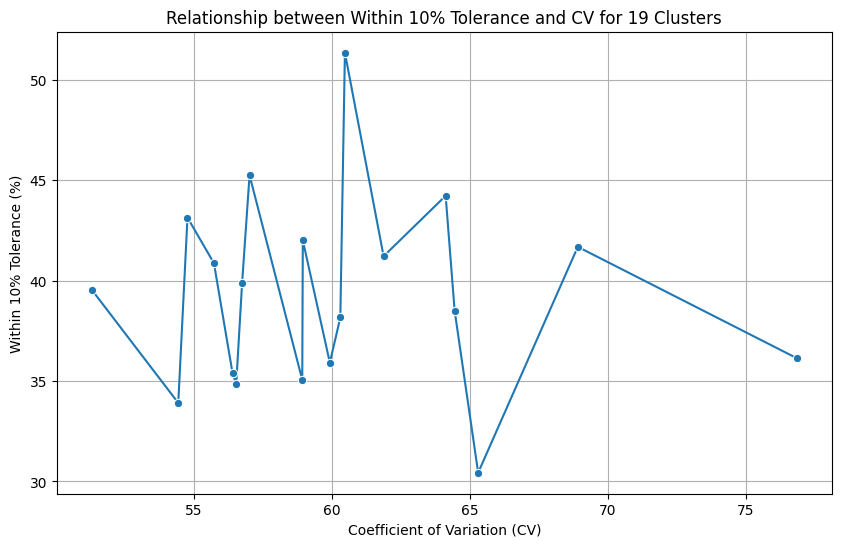

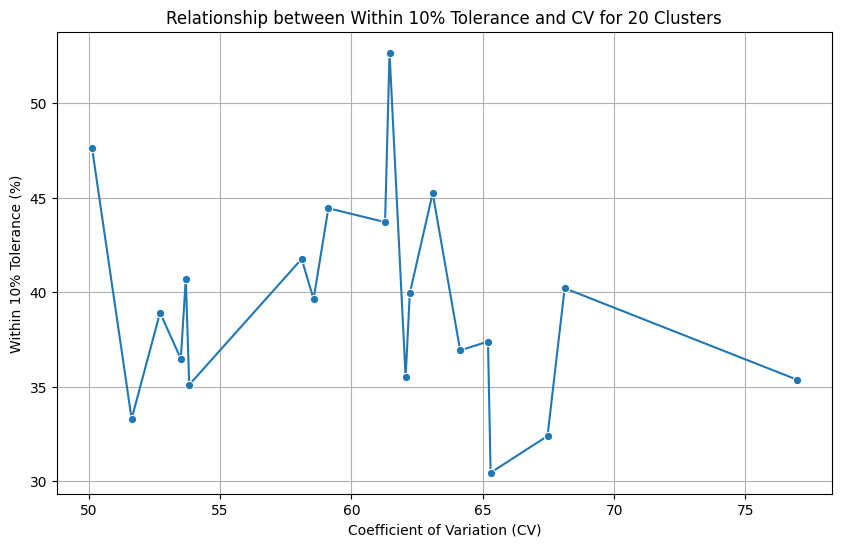

In [14]:
# Load the datasets
data_path = '../13. Data from R 50000/'
X_train = pd.read_parquet(data_path + 'X_train_2024.parquet', engine='pyarrow')
X_test = pd.read_parquet(data_path + 'X_test_2024.parquet', engine='pyarrow')
seed_num = 2024

# Load y_train and y_test
y_train = pd.read_parquet(data_path + 'y_train_2024.parquet').iloc[:, 0]
y_test = pd.read_parquet(data_path + 'y_test_2024.parquet').iloc[:, 0]

# Function to calculate percentage within tolerance
def calculate_within_tolerance(y_true, y_pred, tolerance):
    within_tolerance = abs(y_true - y_pred) / y_true <= tolerance
    percentage_within_tolerance = within_tolerance.mean() * 100
    return percentage_within_tolerance

# Function to calculate CV
def calculate_cv(data):
    return np.std(data) / np.mean(data) * 100

# Initialize lists to store global true values and predictions
all_y_test_global = []
all_y_pred_global = []

# Processing datasets
for i in range(2, 21):  # Loop from 2 to 20 clusters
    X_train_additional = pd.read_parquet(f'{data_path}X_train_proto_c{i}_seed_2024.parquet')
    X_test_additional = pd.read_parquet(f'{data_path}X_test_proto_c{i}_seed_2024.parquet')
    
    # Append the last columns to the main datasets
    X_train[f'additional_feature_{i}'] = X_train_additional.iloc[:, -1]
    X_test[f'additional_feature_{i}'] = X_test_additional.iloc[:, -1]

    # Unique values in the 'additional_feature' column
    unique_values = X_train[f'additional_feature_{i}'].unique()

    # Initialize lists to store CV and tolerance metrics for each segment
    cv_values = []
    within_10_values = []

    for value in unique_values:
        # Split the data by 'additional_feature'
        X_train_subset = X_train[X_train[f'additional_feature_{i}'] == value]
        X_test_subset = X_test[X_test[f'additional_feature_{i}'] == value]
        y_train_subset = y_train[X_train[f'additional_feature_{i}'] == value]
        y_test_subset = y_test[X_test[f'additional_feature_{i}'] == value]

        # Initialize and train the XGBoost model
        model = XGBRegressor(random_state=2024)
        model.fit(X_train_subset.drop(columns=[f'additional_feature_{i}']), y_train_subset)

        # Predict on the corresponding test set
        y_pred_subset = model.predict(X_test_subset.drop(columns=[f'additional_feature_{i}']))

        # Calculate CV for the training data segment
        cv = calculate_cv(y_train_subset)
        cv_values.append(cv)

        # Calculate within tolerance for this segment
        within_10 = calculate_within_tolerance(y_test_subset, y_pred_subset, 0.10)
        within_10_values.append(within_10)

    # Create a DataFrame to store and sort the values based on CV
    results_df = pd.DataFrame({
        'CV': cv_values,
        'Within 10%': within_10_values
    })

    results_df = results_df.sort_values(by='CV').reset_index(drop=True)

    # Plotting the relationship
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=results_df, x='CV', y='Within 10%', marker='o')
    plt.title(f'Relationship between Within 10% Tolerance and CV for {i} Clusters')
    plt.xlabel('Coefficient of Variation (CV)')
    plt.ylabel('Within 10% Tolerance (%)')
    plt.grid(True)
    plt.show()


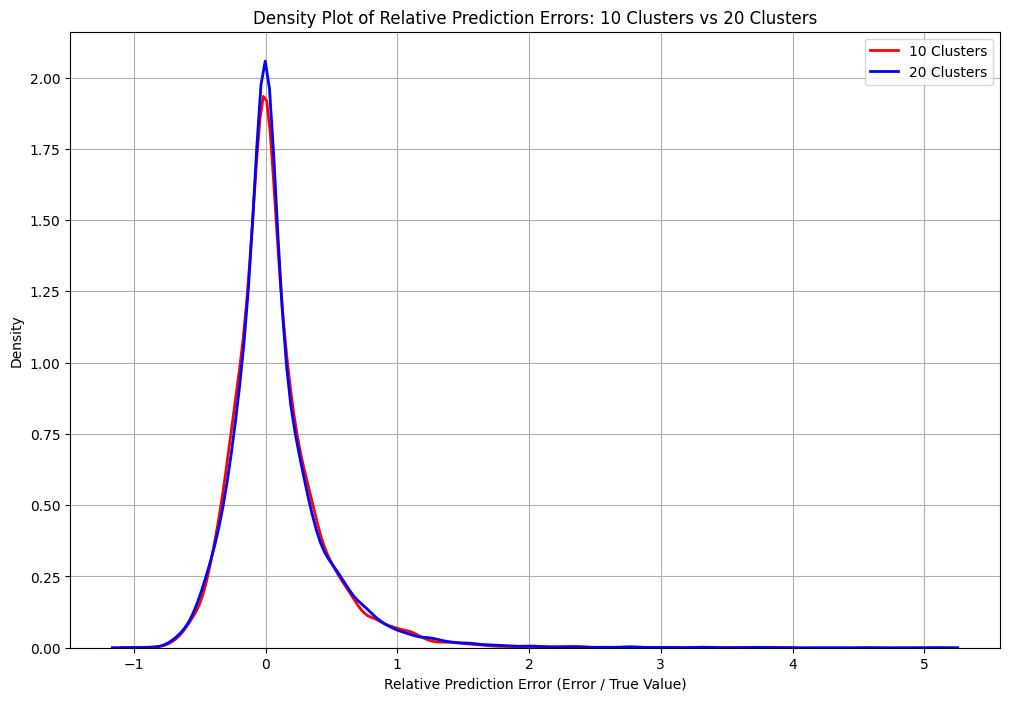

In [15]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
data_path = '../13. Data from R 50000/'
X_train = pd.read_parquet(data_path + 'X_train_2024.parquet', engine='pyarrow')
X_test = pd.read_parquet(data_path + 'X_test_2024.parquet', engine='pyarrow')
seed_num = 2024

# Load y_train and y_test
y_train = pd.read_parquet(data_path + 'y_train_2024.parquet').iloc[:, 0]
y_test = pd.read_parquet(data_path + 'y_test_2024.parquet').iloc[:, 0]

# List of categorical variables
categorical_vars = [
    "MARITALSTATUS", "NOOFCHILDREN", "HOMEOWNERIND", "VEHICLE_LEFTORRIGHTHANDDRIVE",
    "DRIVER1_LICENCETYPE", "DRIVER2_LICENCETYPE", "DRIVER3_LICENCETYPE", "DRIVER4_LICENCETYPE",
    "DRIVER1_OTHERVEHICLEOWNEDIND", "DRIVER2_OTHERVEHICLEOWNEDIND", "DRIVER3_OTHERVEHICLEOWNEDIND",
    "DRIVER4_OTHERVEHICLEOWNEDIND", "MONTHLYPAYMENTSIND", "VEHICLE_USE_TYPE", "VEHICLEOVERNIGHTLOCATION",
    "VEHICLE_OWNERSHIP", "VEHICLE_MODIFIEDIND", "VEHICLE_BODYTYPE", "VEHICLE_FUELTYPE",
    "VEHICLE_TRANSMISSIONTYPE", "INDICATOR_NRCONVICTIONS_RECENT", "INDICATOR_CLAIMSCOUNT_RECENT"
]

# Define numerical columns by excluding categorical ones
numerical_vars = [col for col in X_train.columns if col not in categorical_vars]

# Function to perform the training and get errors
def train_and_get_errors(X_train, X_test, y_train, y_test, clusters):
    # Initialize lists to store the combined true values and predictions for this dataset
    dataset_y_test = []
    dataset_y_pred = []
    
    # Unique values in the 'additional_feature' column
    unique_values = X_train[f'additional_feature_{clusters}'].unique()

    for value in unique_values:
        # Split the data by 'additional_feature'
        X_train_subset = X_train[X_train[f'additional_feature_{clusters}'] == value]
        X_test_subset = X_test[X_test[f'additional_feature_{clusters}'] == value]
        y_train_subset = y_train[X_train[f'additional_feature_{clusters}'] == value]
        y_test_subset = y_test[X_test[f'additional_feature_{clusters}'] == value]

        # Initialize and train the XGBoost model
        model = XGBRegressor(random_state=2024)
        model.fit(X_train_subset.drop(columns=[f'additional_feature_{clusters}']), y_train_subset)

        # Predict on the corresponding test set
        y_pred_subset = model.predict(X_test_subset.drop(columns=[f'additional_feature_{clusters}']))

        # Combine predictions and true values for this dataset
        dataset_y_test.extend(y_test_subset.tolist())
        dataset_y_pred.extend(y_pred_subset.tolist())
    
    # Convert combined lists to numpy arrays for overall evaluation for this dataset
    dataset_y_test = np.array(dataset_y_test)
    dataset_y_pred = np.array(dataset_y_pred)
    
    # Calculate relative prediction errors
    relative_errors = (dataset_y_pred - dataset_y_test) / dataset_y_test
    
    return relative_errors

# Append the last columns to the main datasets for 10 and 20 clusters
X_train_10 = pd.read_parquet(f'{data_path}X_train_proto_c10_seed_2024.parquet')
X_test_10 = pd.read_parquet(f'{data_path}X_test_proto_c10_seed_2024.parquet')
X_train_20 = pd.read_parquet(f'{data_path}X_train_proto_c20_seed_2024.parquet')
X_test_20 = pd.read_parquet(f'{data_path}X_test_proto_c20_seed_2024.parquet')

X_train['additional_feature_10'] = X_train_10.iloc[:, -1]
X_test['additional_feature_10'] = X_test_10.iloc[:, -1]
X_train['additional_feature_20'] = X_train_20.iloc[:, -1]
X_test['additional_feature_20'] = X_test_20.iloc[:, -1]

# Calculate the errors for both 10 clusters and 20 clusters
errors_10_clusters = train_and_get_errors(X_train, X_test, y_train, y_test, 10)
errors_20_clusters = train_and_get_errors(X_train, X_test, y_train, y_test, 20)

# Plotting the density curve for comparison
plt.figure(figsize=(12, 8))
sns.kdeplot(errors_10_clusters, label='10 Clusters', color='red', linewidth=2)
sns.kdeplot(errors_20_clusters, label='20 Clusters', color='blue', linewidth=2)
plt.title('Density Plot of Relative Prediction Errors: 10 Clusters vs 20 Clusters')
plt.xlabel('Relative Prediction Error (Error / True Value)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()
